# Stage 1: Basic data ingestion 

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

file1 = 'BlackHoleSimulation.tr'
file2 = 'BlackHoleSimulation-3.tr'
file3 = 'BlackHoleSimulation-5.tr'

# with open(file, 'r') as file:
#     header = file.readlines()[0:17]
 
with open(file1, 'r') as header1:
    header1 = header1.readlines()[:17]

with open(file1, 'r') as data1:
    data1 = data1.readlines()[17:]

with open(file2, 'r') as header2:
    header2 = header2.readlines()[:17]

with open(file2, 'r') as data2:
    data2 = data2.readlines()[17:]

with open(file3, 'r') as header3:
    header3 = header3.readlines()[:17]

with open(file3, 'r') as data3:
    data3 = data3.readlines()[17:]


selected_dataset = data3

In [232]:
print(len(data1))
print(len(data2))
print(len(data3))

927339
828266
654716


In [233]:
header1

['M 1.00000 0 (291.73, 421.48, 0.00), (56.84, 374.14), 19.66\n',
 'M 1.00000 1 (289.08, 471.36, 0.00), (430.74, 327.99), 7.40\n',
 'M 1.00000 2 (200.25, 141.61, 0.00), (14.75, 37.53), 13.45\n',
 'M 1.00000 3 (175.55, 189.28, 0.00), (376.28, 91.01), 4.00\n',
 'M 1.00000 4 (43.57, 242.49, 0.00), (427.85, 3.98), 15.23\n',
 'M 1.00000 5 (478.91, 53.45, 0.00), (275.61, 411.91), 2.93\n',
 'M 1.00000 6 (335.41, 170.97, 0.00), (218.23, 184.91), 4.62\n',
 'M 1.00000 7 (61.76, 229.94, 0.00), (279.50, 244.83), 9.76\n',
 'M 1.00000 8 (219.68, 100.33, 0.00), (432.65, 303.74), 11.14\n',
 'M 1.00000 9 (467.86, 155.47, 0.00), (320.15, 268.88), 10.14\n',
 'M 1.00000 10 (412.40, 495.71, 0.00), (222.69, 368.21), 0.18\n',
 'M 1.00000 11 (125.53, 182.11, 0.00), (449.15, 151.09), 0.37\n',
 'M 1.00000 12 (442.43, 200.74, 0.00), (248.78, 54.39), 11.30\n',
 'M 1.00000 13 (290.33, 449.06, 0.00), (295.94, 409.17), 18.51\n',
 'M 1.00000 14 (353.73, 458.62, 0.00), (230.21, 146.11), 9.16\n',
 'M 1.00000 15 (171.33,

In [234]:
selected_dataset[:10]

['s -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl AGT -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.0 -Id 2.0 -It cbr -Il 512 -If 0 -Ii 0 -Iv 32 -Pn cbr -Pi 0 -Pf 0 -Po 2 \n',
 'r -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl RTR -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.0 -Id 2.0 -It cbr -Il 512 -If 0 -Ii 0 -Iv 32 -Pn cbr -Pi 0 -Pf 0 -Po 2 \n',
 's -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl RTR -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.255 -Id -1.255 -It AODV -Il 48 -If 0 -Ii 0 -Iv 30 -P aodv -Pt 0x2 -Ph 1 -Pb 1 -Pd 2 -Pds 0 -Ps 1 -Pss 4 -Pc REQUEST \n',
 's -t 2.556953879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.19 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl MAC -Nw --- -Ma 0 -Md ffffffff -Ms 1 -Mt 800 -Is 1.255 -Id -1.255 -It AODV -Il 106 -If 0 -Ii 0 -Iv 30 -P aodv -Pt 0x2 -Ph 1 -Pb 1 -Pd 2 -Pds 0 -Ps 1 -Pss 4 -Pc REQUEST \n',
 'r -t 2.557802021 -Hs 13 -Hd -2 -Ni 13 -Nx 294.34 -Ny 420.51 -Nz 0.00 -Ne -1.00

In [235]:
data_series = pd.Series(selected_dataset)
data_df_exp = pd.DataFrame(data_series, columns=['temp'])

In [236]:
data_df_exp.head(4)

,temp
0,s -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl AGT -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.0 -Id 2.0 -It cbr -Il 512 -If 0 -Ii 0 -Iv 32 -Pn cbr -Pi 0 -Pf 0 -Po 2 \n
1,r -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl RTR -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.0 -Id 2.0 -It cbr -Il 512 -If 0 -Ii 0 -Iv 32 -Pn cbr -Pi 0 -Pf 0 -Po 2 \n
2,s -t 2.556838879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.18 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl RTR -Nw --- -Ma 0 -Md 0 -Ms 0 -Mt 0 -Is 1.255 -Id -1.255 -It AODV -Il 48 -If 0 -Ii 0 -Iv 30 -P aodv -Pt 0x2 -Ph 1 -Pb 1 -Pd 2 -Pds 0 -Ps 1 -Pss 4 -Pc REQUEST \n
3,s -t 2.556953879 -Hs 1 -Hd -2 -Ni 1 -Nx 297.19 -Ny 463.16 -Nz 0.00 -Ne -1.000000 -Nl MAC -Nw --- -Ma 0 -Md ffffffff -Ms 1 -Mt 800 -Is 1.255 -Id -1.255 -It AODV -Il 106 -If 0 -Ii 0 -Iv 30 -P aodv -Pt 0x2 -Ph 1 -Pb 1 -Pd 2 -Pds 0 -Ps 1 -Pss 4 -Pc REQUEST \n


In [237]:
# Assuming data_df_exp is your dataframe
data_df_exp['temp'] = data_df_exp['temp'].str.split()

# Create separate columns for each variable
data_df_exp['type'] = data_df_exp['temp'].apply(lambda x: x[0])
data_df_exp['-t'] = data_df_exp['temp'].apply(lambda x: x[x.index('-t')+1] if '-t' in x else None)
data_df_exp['-Hs'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Hs')+1] if '-Hs' in x else None)
data_df_exp['-Hd'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Hd')+1] if '-Hd' in x else None)
data_df_exp['-Ni'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ni')+1] if '-Ni' in x else None)
data_df_exp['-Nx'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Nx')+1] if '-Nx' in x else None)
data_df_exp['-Ny'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ny')+1] if '-Ny' in x else None)
data_df_exp['-Nz'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Nz')+1] if '-Nz' in x else None)
data_df_exp['-Ne'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ne')+1] if '-Ne' in x else None)
data_df_exp['-Nl'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Nl')+1] if '-Nl' in x else None)
data_df_exp['-Nw'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Nw')+1] if '-Nw' in x else None)
data_df_exp['-Ma'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ma')+1] if '-Ma' in x else None)
data_df_exp['-Md'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Md')+1] if '-Md' in x else None)
data_df_exp['-Ms'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ms')+1] if '-Ms' in x else None)
data_df_exp['-Mt'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Mt')+1] if '-Mt' in x else None)
data_df_exp['-Is'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Is')+1] if '-Is' in x else None)
data_df_exp['-Id'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Id')+1] if '-Id' in x else None)
data_df_exp['-It'] = data_df_exp['temp'].apply(lambda x: x[x.index('-It')+1] if '-It' in x else None)
data_df_exp['-Il'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Il')+1] if '-Il' in x else None)
data_df_exp['-If'] = data_df_exp['temp'].apply(lambda x: x[x.index('-If')+1] if '-If' in x else None)
data_df_exp['-Ii'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ii')+1] if '-Ii' in x else None)
data_df_exp['-Iv'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Iv')+1] if '-Iv' in x else None)
data_df_exp['-P'] = data_df_exp['temp'].apply(lambda x: x[x.index('-P')+1] if '-P' in x else None)
data_df_exp['-Pt'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pt')+1] if '-Pt' in x else None)
data_df_exp['-Ph'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ph')+1] if '-Ph' in x else None)
data_df_exp['-Pb'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pb')+1] if '-Pb' in x else None)
data_df_exp['-Pd'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pd')+1] if '-Pd' in x else None)
data_df_exp['-Pds'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pds')+1] if '-Pds' in x else None)
data_df_exp['-Ps'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Ps')+1] if '-Ps' in x else None)
data_df_exp['-Pss'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pss')+1] if '-Pss' in x else None)
data_df_exp['-Pc'] = data_df_exp['temp'].apply(lambda x: x[x.index('-Pc')+1] if '-Pc' in x else None)


# Drop the 'temp' column
data_df_exp = data_df_exp.drop(columns=['temp'])

ns2_trace_df = data_df_exp


In [238]:
ns2_trace_df[:50]

,type,-t,-Hs,-Hd,-Ni,-Nx,-Ny,-Nz,-Ne,-Nl,-Nw,-Ma,-Md,-Ms,-Mt,-Is,-Id,-It,-Il,-If,-Ii,-Iv,-P,-Pt,-Ph,-Pb,-Pd,-Pds,-Ps,-Pss,-Pc
0,s,2.556838879,1,-2,1,297.18,463.16,0.00,-1.000000,AGT,---,0,0,0,0,1.0,2.0,cbr,512,0,0,32,None,None,None,None,None,None,None,None,None
1,r,2.556838879,1,-2,1,297.18,463.16,0.00,-1.000000,RTR,---,0,0,0,0,1.0,2.0,cbr,512,0,0,32,None,None,None,None,None,None,None,None,None
2,s,2.556838879,1,-2,1,297.18,463.16,0.00,-1.000000,RTR,---,0,0,0,0,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
3,s,2.556953879,1,-2,1,297.19,463.16,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,106,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
4,r,2.557802021,13,-2,13,294.34,420.51,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
5,r,2.557802060,14,-2,14,348.49,445.34,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
6,r,2.557802077,0,-2,0,261.71,415.43,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
7,r,2.557802277,10,-2,10,412.17,495.55,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
8,r,2.557802664,16,-2,16,167.18,266.63,0.00,-1.000000,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST
9,r,2.557827021,13,-2,13,294.34,420.51,0.00,-1.000000,RTR,---,0,ffffffff,1,800,1.255,-1.255,AODV,48,0,0,30,aodv,0x2,1,1,2,0,1,4,REQUEST


In [239]:
ns2_trace_df.shape

(654716, 31)

# Stage 2 Data understanding

![Data Dictionary V.1](Data_Dictionary_v1.png)


In [240]:
trace_variable_list = [
    "Event type",
    "Timestamp",
    "Source Node",
    "Destination Node",
    "Node ID",
    "Node Position (x)",
    "Node Position (y)",
    "Node Position (z)",
    "Energy",
    "Network Layer",
    "Link Layer",
    "MAC State",
    "MAC State Info 1",
    "MAC State Info 2",
    "MAC State Info 3",
    "IP Source Address",
    "IP Destination Address",
    "IP Packet Type",
    "IP Packet Length",
    "IP Flow ID",
    "IP Identifier",
    "IP Time to Live (TTL)",
    "Protocol",
    "Type",
    "Hop Count",
    "Broadcast",
    "Destination Sequence Number",
    "Source Sequence Number",
    "Source IP Address",
    "Source Sequence Number Status",
    "Request Status"
]

ns2_trace_df.columns = trace_variable_list

# Stage 3 cleaning

In [241]:
# Code to loop through all variables and display the unique values in each column

for var in ns2_trace_df.columns:
    print(f"Variable name: {var}")
    print(f"Unique values for variable: {ns2_trace_df[var].unique()}")
    print()

Variable name: Event type
Unique values for variable: ['s' 'r' 'f' 'd' 'M']

Variable name: Timestamp
Unique values for variable: ['2.556838879' '2.556953879' '2.557802021' ... '499.989575937'
 '499.992491509' '499.998735937']

Variable name: Source Node
Unique values for variable: ['1' '13' '14' '0' '10' '16' '3' '11' '7' '4' '2' '8' '6' '15' '12' '9'
 '5' None]

Variable name: Destination Node
Unique values for variable: ['-2' '1' '3' '0' '13' None '7' '6' '16' '8' '14' '5' '9' '11' '12' '4'
 '15' '2']

Variable name: Node ID
Unique values for variable: ['1' '13' '14' '0' '10' '16' '3' '11' '7' '4' '2' '8' '6' '15' '12' '9'
 '5' None]

Variable name: Node Position (x)
Unique values for variable: ['297.18' '297.19' '294.34' ... '308.68' '308.75' '308.80']

Variable name: Node Position (y)
Unique values for variable: ['463.16' '420.51' '445.34' ... '164.56' '164.54' '164.53']

Variable name: Node Position (z)
Unique values for variable: ['0.00' None]

Variable name: Energy
Unique value

In [242]:
ns2_trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654716 entries, 0 to 654715
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Event type                     654716 non-null  object
 1   Timestamp                      654654 non-null  object
 2   Source Node                    654654 non-null  object
 3   Destination Node               654654 non-null  object
 4   Node ID                        654654 non-null  object
 5   Node Position (x)              654654 non-null  object
 6   Node Position (y)              654654 non-null  object
 7   Node Position (z)              654654 non-null  object
 8   Energy                         654654 non-null  object
 9   Network Layer                  654654 non-null  object
 10  Link Layer                     654654 non-null  object
 11  MAC State                      654654 non-null  object
 12  MAC State Info 1               654654 non-nu

In [243]:
ns2_trace_df.isna().sum()

Event type                            0
Timestamp                            62
Source Node                          62
Destination Node                     62
Node ID                              62
Node Position (x)                    62
Node Position (y)                    62
Node Position (z)                    62
Energy                               62
Network Layer                        62
Link Layer                           62
MAC State                            62
MAC State Info 1                     62
MAC State Info 2                     62
MAC State Info 3                     62
IP Source Address                324126
IP Destination Address           324126
IP Packet Type                   324126
IP Packet Length                 324126
IP Flow ID                       324126
IP Identifier                    324126
IP Time to Live (TTL)            324126
Protocol                         643252
Type                             644062
Hop Count                        644062


In [244]:
test = ns2_trace_df[ns2_trace_df['Timestamp'].isna()]
test[:20]

,Event type,Timestamp,Source Node,Destination Node,Node ID,Node Position (x),Node Position (y),Node Position (z),Energy,Network Layer,Link Layer,MAC State,MAC State Info 1,MAC State Info 2,MAC State Info 3,IP Source Address,IP Destination Address,IP Packet Type,IP Packet Length,IP Flow ID,IP Identifier,IP Time to Live (TTL),Protocol,Type,Hop Count,Broadcast,Destination Sequence Number,Source Sequence Number,Source IP Address,Source Sequence Number Status,Request Status
415,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
520,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2406,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2615,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3175,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3189,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3255,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3347,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3387,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3414,M,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [245]:
# Remove the rows where source node is na
ns2_trace_df = ns2_trace_df[ns2_trace_df['Timestamp'].notna()]
ns2_trace_df.isna().sum() / len(ns2_trace_df) * 100

Event type                        0.000000
Timestamp                         0.000000
Source Node                       0.000000
Destination Node                  0.000000
Node ID                           0.000000
Node Position (x)                 0.000000
Node Position (y)                 0.000000
Node Position (z)                 0.000000
Energy                            0.000000
Network Layer                     0.000000
Link Layer                        0.000000
MAC State                         0.000000
MAC State Info 1                  0.000000
MAC State Info 2                  0.000000
MAC State Info 3                  0.000000
IP Source Address                49.501569
IP Destination Address           49.501569
IP Packet Type                   49.501569
IP Packet Length                 49.501569
IP Flow ID                       49.501569
IP Identifier                    49.501569
IP Time to Live (TTL)            49.501569
Protocol                         98.248846
Type       

In [246]:
# Change data types of variables

# Float conversion
ns2_trace_df["Timestamp"] = ns2_trace_df["Timestamp"].astype("float32")
ns2_trace_df["IP Source Address"] = ns2_trace_df["IP Source Address"].astype("float32")
ns2_trace_df["IP Destination Address"] = ns2_trace_df["IP Destination Address"].astype("float32")
ns2_trace_df["Node Position (x)"] = ns2_trace_df["Node Position (x)"].astype("float32")
ns2_trace_df["Node Position (y)"] = ns2_trace_df["Node Position (y)"].astype("float32")
ns2_trace_df["IP Packet Length"] = ns2_trace_df["IP Packet Length"].astype("float32")
ns2_trace_df["IP Identifier"] = ns2_trace_df["IP Identifier"].astype("float32")
ns2_trace_df["IP Time to Live (TTL)"] = ns2_trace_df["IP Time to Live (TTL)"].astype("float32")
ns2_trace_df["Hop Count"] = ns2_trace_df["Hop Count"].astype("float32")
ns2_trace_df["Broadcast"] = ns2_trace_df["Broadcast"].astype("float32")
ns2_trace_df["Destination Sequence Number"] = ns2_trace_df["Destination Sequence Number"].astype("float32")
ns2_trace_df["Source Sequence Number"] = ns2_trace_df["Source Sequence Number"].astype("float32")
ns2_trace_df["Source IP Address"] = ns2_trace_df["Source IP Address"].astype("float32")
ns2_trace_df["Source Sequence Number Status"] = ns2_trace_df["Source Sequence Number Status"].astype("float32")
ns2_trace_df["IP Flow ID"] = ns2_trace_df["IP Flow ID"].astype("float32")

# Categorical conversion
ns2_trace_df["Source Node"] = ns2_trace_df["Source Node"].astype("category")
ns2_trace_df["Destination Node"] = ns2_trace_df["Destination Node"].astype("category") #
ns2_trace_df["Network Layer"] = ns2_trace_df["Network Layer"].astype("category") #
ns2_trace_df["Link Layer"] = ns2_trace_df["Link Layer"].astype("category") #
ns2_trace_df["MAC State"] = ns2_trace_df["MAC State"].astype("category") #
ns2_trace_df["MAC State Info 1"] = ns2_trace_df["MAC State Info 1"].astype("category") #
ns2_trace_df["MAC State Info 2"] = ns2_trace_df["MAC State Info 2"].astype("category") #
ns2_trace_df["MAC State Info 3"] = ns2_trace_df["MAC State Info 3"].astype("category") #
ns2_trace_df["IP Packet Type"] = ns2_trace_df["IP Packet Type"].astype("category") #
ns2_trace_df["Protocol"] = ns2_trace_df["Protocol"].astype("category") #
ns2_trace_df["Type"] = ns2_trace_df["Type"].astype("category") #
ns2_trace_df["Request Status"]= ns2_trace_df["Request Status"].astype("category")
ns2_trace_df["Event type"] = ns2_trace_df["Event type"].astype("category") #




# Remove useless variables
ns2_trace_df = ns2_trace_df.drop(columns=['Node Position (z)','Node ID','Energy'])

ns2_trace_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654654 entries, 0 to 654715
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Event type                     654654 non-null  category
 1   Timestamp                      654654 non-null  float32 
 2   Source Node                    654654 non-null  category
 3   Destination Node               654654 non-null  category
 4   Node Position (x)              654654 non-null  float32 
 5   Node Position (y)              654654 non-null  float32 
 6   Network Layer                  654654 non-null  category
 7   Link Layer                     654654 non-null  category
 8   MAC State                      654654 non-null  category
 9   MAC State Info 1               654654 non-null  category
 10  MAC State Info 2               654654 non-null  category
 11  MAC State Info 3               654654 non-null  category
 12  IP Source Address    

In [247]:
# Check counts for each node
print(ns2_trace_df['Source Node'].value_counts())

ns2_trace_df.to_pickle('ns2_trace_df.pkl')
ns2_trace_df[:20]

Source Node
12    109256
13    103317
15     95452
1      53083
11     51317
7      49459
9      48213
4      39872
16     25231
14     25146
8      25011
6      23174
0       2952
2       1174
3        853
5        670
10       474
Name: count, dtype: int64


,Event type,Timestamp,Source Node,Destination Node,Node Position (x),Node Position (y),Network Layer,Link Layer,MAC State,MAC State Info 1,MAC State Info 2,MAC State Info 3,IP Source Address,IP Destination Address,IP Packet Type,IP Packet Length,IP Flow ID,IP Identifier,IP Time to Live (TTL),Protocol,Type,Hop Count,Broadcast,Destination Sequence Number,Source Sequence Number,Source IP Address,Source Sequence Number Status,Request Status
0,s,2.556839,1,-2,297.179993,463.160004,AGT,---,0,0,0,0,1.000000,2.000,cbr,512.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r,2.556839,1,-2,297.179993,463.160004,RTR,---,0,0,0,0,1.000000,2.000,cbr,512.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s,2.556839,1,-2,297.179993,463.160004,RTR,---,0,0,0,0,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
3,s,2.556954,1,-2,297.190002,463.160004,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,106.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
4,r,2.557802,13,-2,294.339996,420.510010,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
5,r,2.557802,14,-2,348.489990,445.339996,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
6,r,2.557802,0,-2,261.709991,415.429993,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
7,r,2.557802,10,-2,412.170013,495.549988,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
8,r,2.557803,16,-2,167.179993,266.630005,MAC,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
9,r,2.557827,13,-2,294.339996,420.510010,RTR,---,0,ffffffff,1,800,1.255000,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST


# Stage 4 malicious node EDA

<img src="Flow-chart_BHN.png" alt="Flow chart" width="600"/>


Black Hole Node characteristics to explore

A black hole node will falsely advertise itself as having the shortest route to a destination but drops all the packets it receives. 

Therefore, we can attempt to observe a high reception and no forwarding (or a significant disparity between the two)

More specifically:

- <b>Event Types:</b><br>
If a node has a significantly high number of received packets ('r' in Event type) but a low number of forwarded packets ('f' in Event type), then this node might be a black hole.

- <b>Destination Node:</b><br>
A black hole node will often show as the destination node frequently but not much as a source node since it drops most of the traffic it receives.

- <b>IP Source and Destination Addresses:</b><br>
Cross-checking the IP Source Address and IP Destination Address to see if packets meant for a specific node are reaching their intended destination or not.

- <b>MAC State:</b><br>
If there are abnormal states or an unusually high number of certain states related to a node, it might be indicative of malicious activity.

- <b>Protocol & Type:</b><br>
Observe any anomalies in the routing protocol (AODV, ARP, etc.) or in the Type values. For instance, if a node sends many route requests (RREQ) but doesn't forward data packets, it could be suspicious.

- <b>Hop Count:</b><br>
A sudden drop in hop count when routing through a particular node might indicate a node advertising false routes.

- <b>Request Status:</b><br>
If a node sends many route requests but doesn't receive many replies or has a lot of errors, it might be suspicious.


1. Visualize Event Types per node

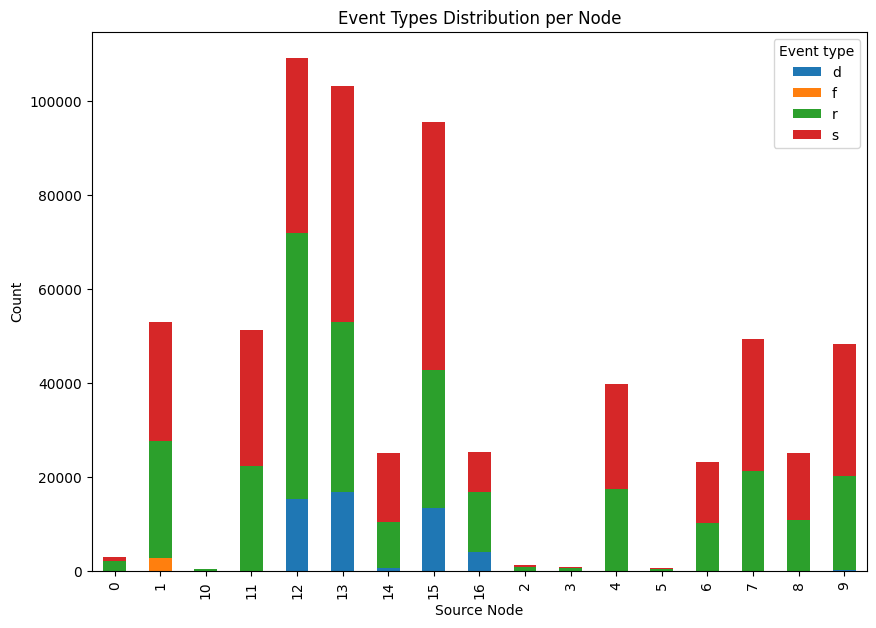

In [248]:
ns2_trace_df_eda = ns2_trace_df.copy()

grouped = ns2_trace_df_eda.groupby('Source Node')['Event type'].value_counts().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Event Types Distribution per Node')
plt.ylabel('Count')
plt.show()

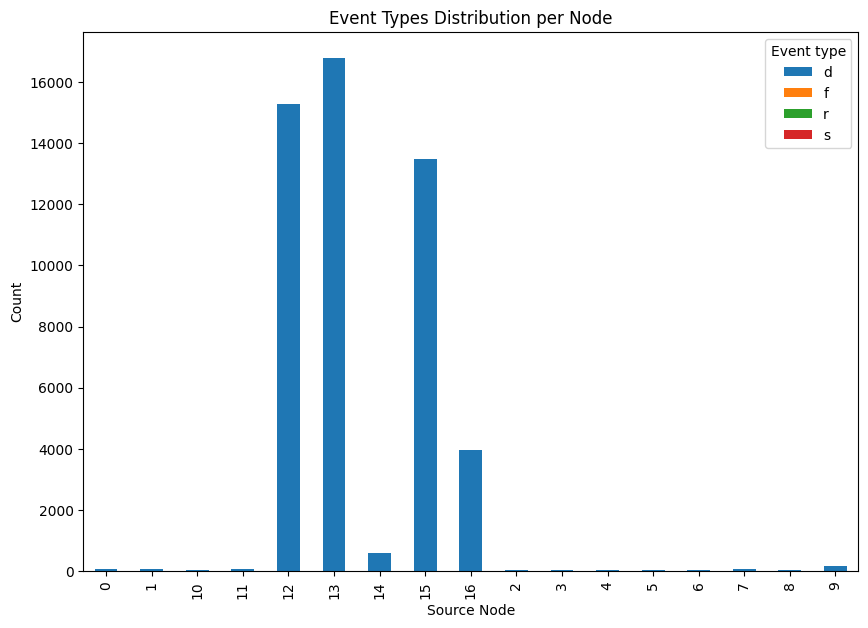

In [249]:
ns2_trace_df_eda = ns2_trace_df.copy()

grouped = ns2_trace_df_eda[ns2_trace_df_eda['Event type'] == 'd'].groupby('Source Node')['Event type'].value_counts().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Event Types Distribution per Node')
plt.ylabel('Count')
plt.show()

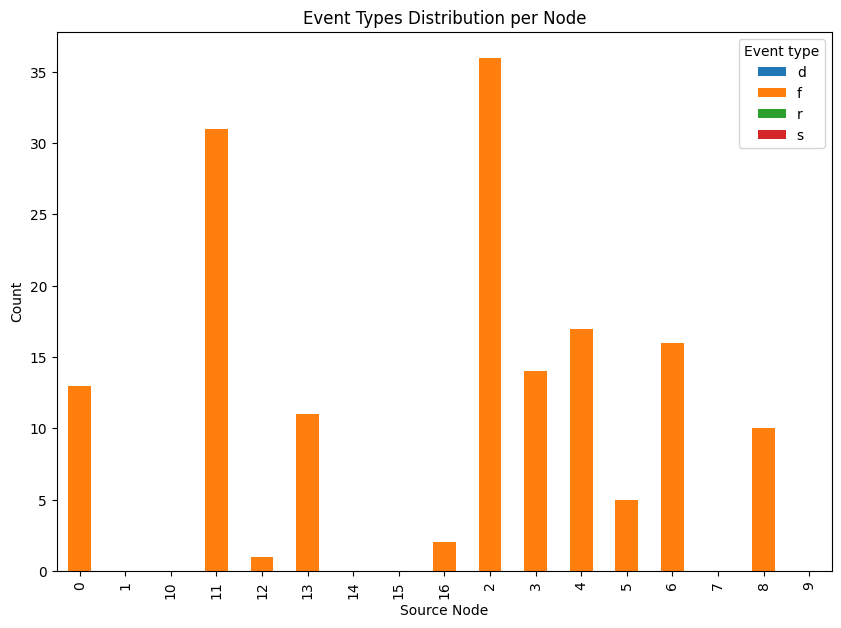

In [250]:
ns2_trace_df_eda = ns2_trace_df.copy()

grouped = ns2_trace_df_eda[(ns2_trace_df_eda['Event type'] == 'f') & (ns2_trace_df_eda['Source Node'] != '1')].groupby('Source Node')['Event type'].value_counts().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Event Types Distribution per Node')
plt.ylabel('Count')
plt.show()

Node 16 has no forwarded packets high receving rate and high dropping rate

In [251]:
# create copy of ns2_trace_df
events_over_time = ns2_trace_df.copy()

In [252]:
s = events_over_time[['Timestamp', 'Event type', 'Source Node']] # sent packets
s = s[s['Event type'] == 's']

r = events_over_time[['Timestamp', 'Event type', 'Source Node']] # received packets
r = r[r['Event type'] == 'r']

d = events_over_time[['Timestamp', 'Event type', 'Source Node']] # dropped packets
d = d[d['Event type'] == 'd']

f = events_over_time[['Timestamp', 'Event type', 'Source Node']] # forwarded packets
f = f[f['Event type'] == 'f']

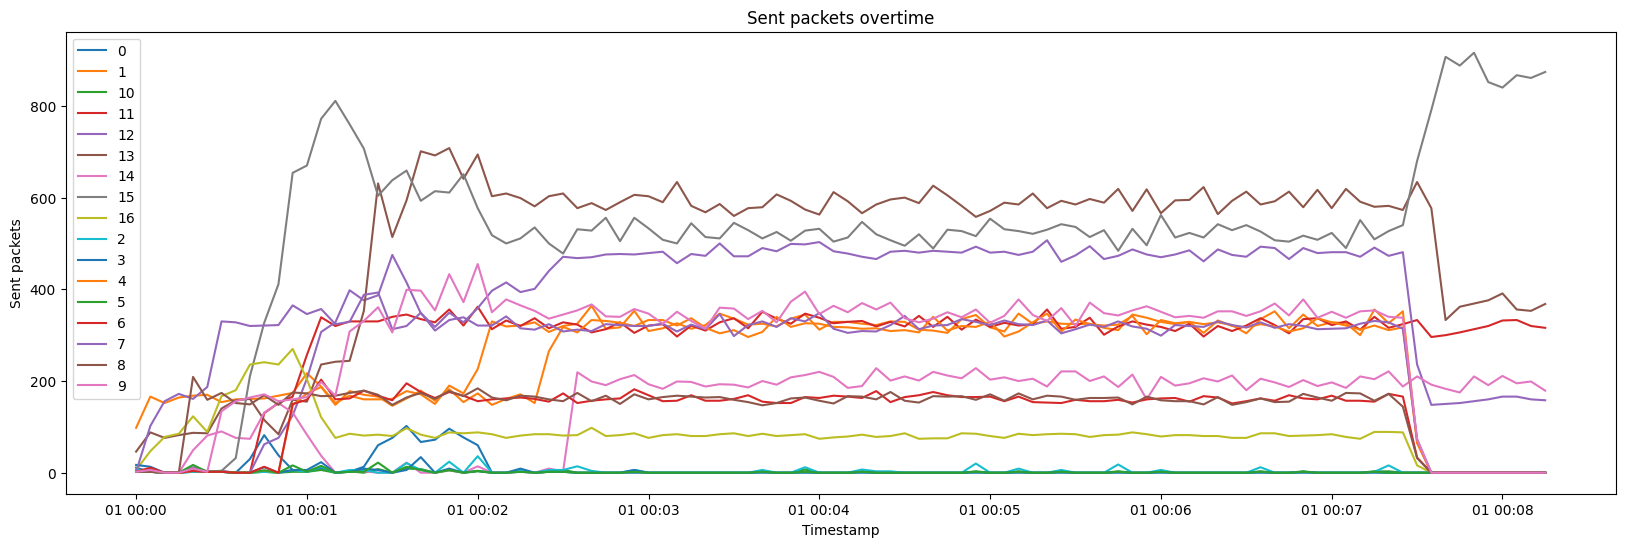

In [253]:
s_grouped = s.groupby(['Timestamp', 'Source Node']).size().reset_index(name='Count')
s_pivot = s_grouped.pivot(index='Timestamp', columns='Source Node', values='Count')
s_pivot.index = pd.to_datetime(s_pivot.index, unit='s')
s_pivot_resampled = s_pivot.resample('5S').sum()

plt.figure(figsize=(20, 6))
for column in s_pivot_resampled:
        plt.plot(s_pivot_resampled.index, s_pivot_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel("Sent packets")
plt.title("Sent packets overtime")
plt.legend()
plt.show()

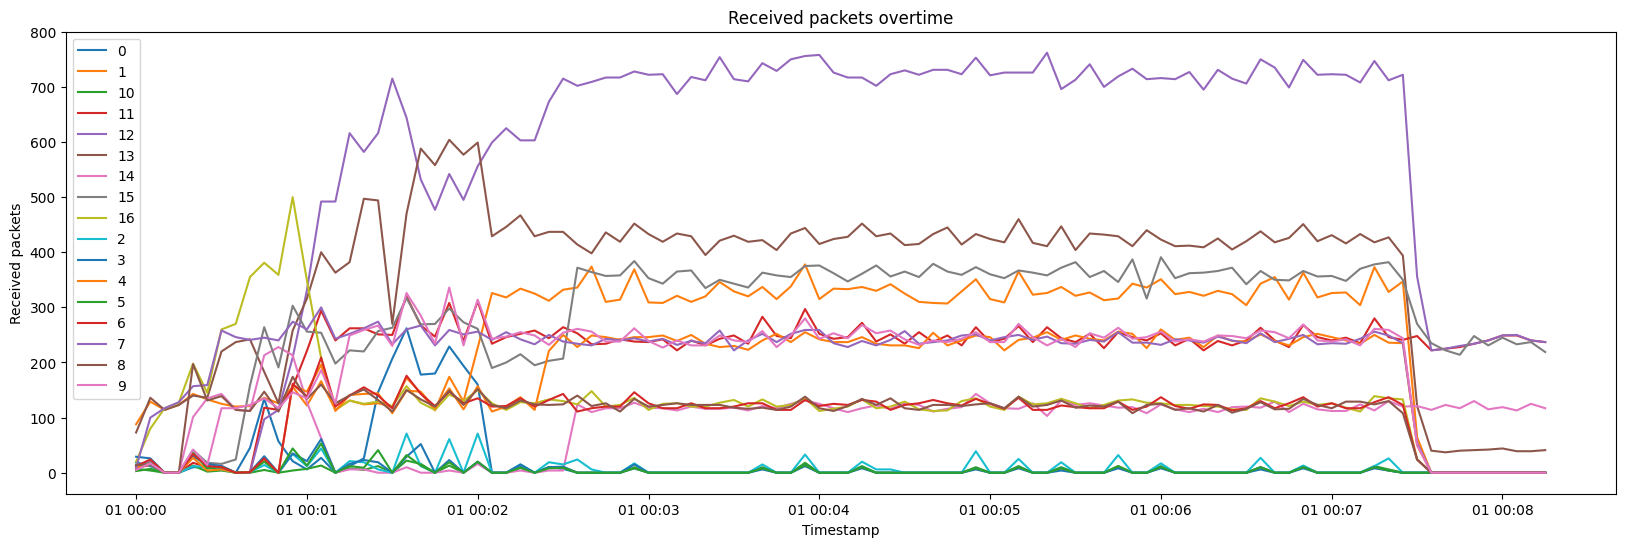

In [254]:
r_grouped = r.groupby(['Timestamp', 'Source Node']).size().reset_index(name='Count')
r_pivot = r_grouped.pivot(index='Timestamp', columns='Source Node', values='Count')
r_pivot.index = pd.to_datetime(r_pivot.index, unit='s')
r_pivot_resampled = r_pivot.resample('5S').sum()
r_pivot_resampled[:100]

plt.figure(figsize=(20, 6))
for column in r_pivot_resampled:
        plt.plot(r_pivot_resampled.index, r_pivot_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel("Received packets")
plt.title("Received packets overtime")
plt.legend()
plt.show()

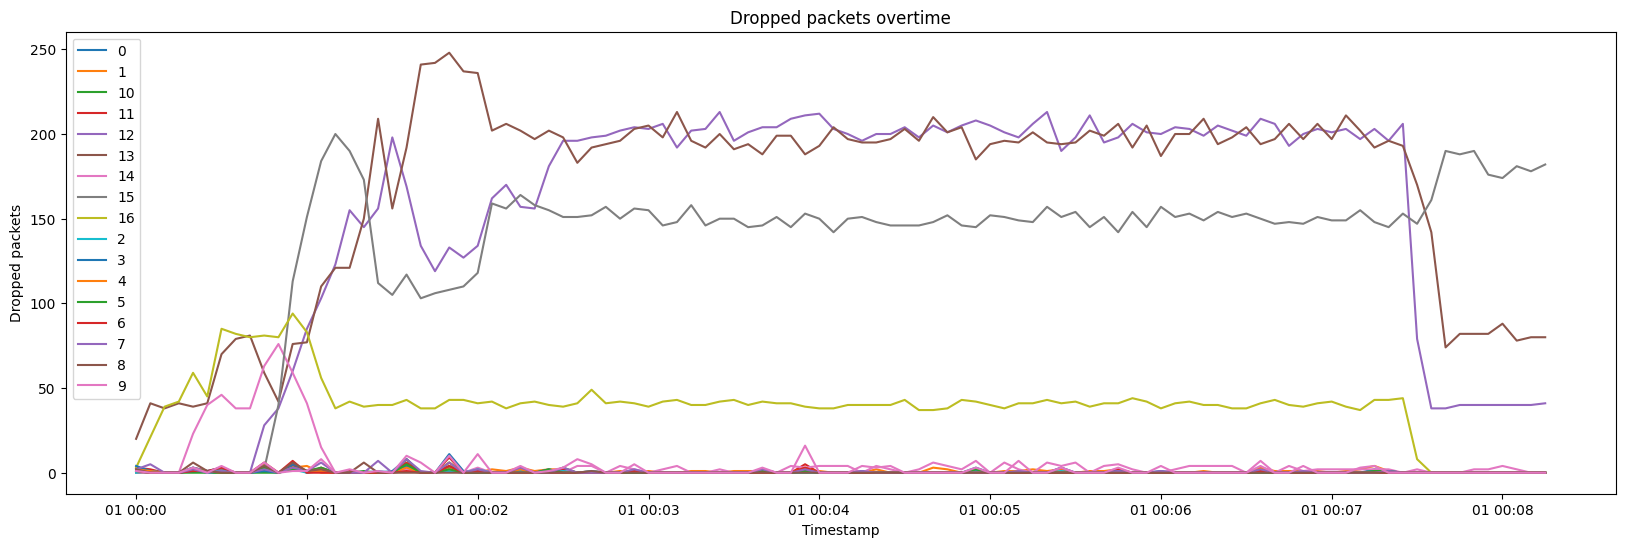

In [255]:
d_grouped = d.groupby(['Timestamp', 'Source Node']).size().reset_index(name='Count')
d_pivot = d_grouped.pivot(index='Timestamp', columns='Source Node', values='Count')
d_pivot.index = pd.to_datetime(d_pivot.index, unit='s')
d_pivot_resampled = d_pivot.resample('5S').sum()
d_pivot_resampled[:100]

plt.figure(figsize=(20, 6))
for column in d_pivot_resampled:
        plt.plot(d_pivot_resampled.index,d_pivot_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel("Dropped packets")
plt.title("Dropped packets overtime")
plt.legend()
plt.show()

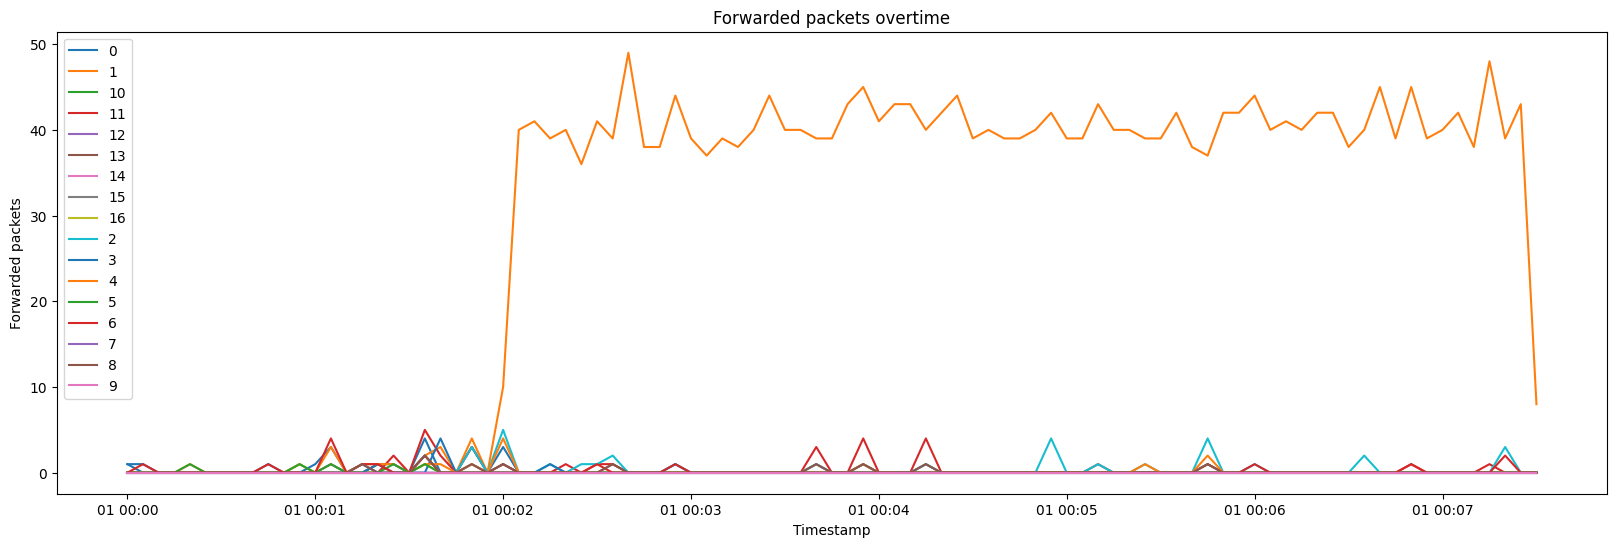

In [256]:
f_grouped = f.groupby(['Timestamp', 'Source Node']).size().reset_index(name='Count')
f_pivot = f_grouped.pivot(index='Timestamp', columns='Source Node', values='Count')
f_pivot.index = pd.to_datetime(f_pivot.index, unit='s')
f_pivot_resampled = f_pivot.resample('5S').sum()
f_pivot_resampled[:100]

plt.figure(figsize=(20, 6))
for column in f_pivot_resampled:
        plt.plot(f_pivot_resampled.index,f_pivot_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel("Forwarded packets")
plt.title("Forwarded packets overtime")
plt.legend()
plt.show()

2. Visualize Destination vs Source node counts

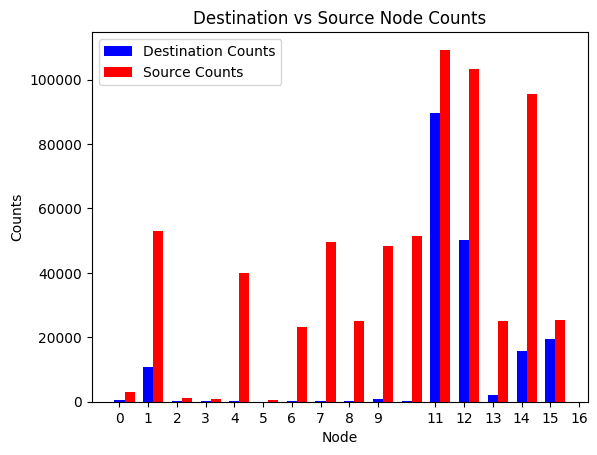

In [257]:
dest_counts = ns2_trace_df['Destination Node'].value_counts().loc[lambda x: x >= 0]
dest_counts = pd.DataFrame(dest_counts)
dest_counts = dest_counts.reset_index()
dest_counts = dest_counts[dest_counts['Destination Node'] != '-2']
dest_counts['Destination Node'] = dest_counts['Destination Node'].astype(int)
dest_counts = dest_counts.sort_values(by=['Destination Node'], ascending=True)
dest_counts = dest_counts.reset_index()
dest_counts = dest_counts.drop(columns=['index'])
#print(dest_counts)

source_counts = ns2_trace_df['Source Node'].value_counts()
source_counts = pd.DataFrame(source_counts)
source_counts = source_counts.reset_index()
source_counts['Source Node'] = source_counts['Source Node'].astype(int)
source_counts = source_counts.sort_values(by=['Source Node'], ascending=True)
source_counts = source_counts.reset_index()
source_counts = source_counts.drop(columns=['index'])
source_counts = source_counts[source_counts['Source Node'] != 10]
source_counts = source_counts.reset_index()
#print(source_counts)

bar_width = 0.35
index = range(len(dest_counts))

plt.bar(index, dest_counts['count'], bar_width, label='Destination Counts', color='b')
plt.bar([i+bar_width for i in index], source_counts['count'], bar_width, label='Source Counts', color='r')
plt.xlabel('Node')
plt.ylabel('Counts')
plt.title('Destination vs Source Node Counts')
plt.xticks(dest_counts['Destination Node'])
plt.legend()
plt.show()

3. Check Hop Count per node

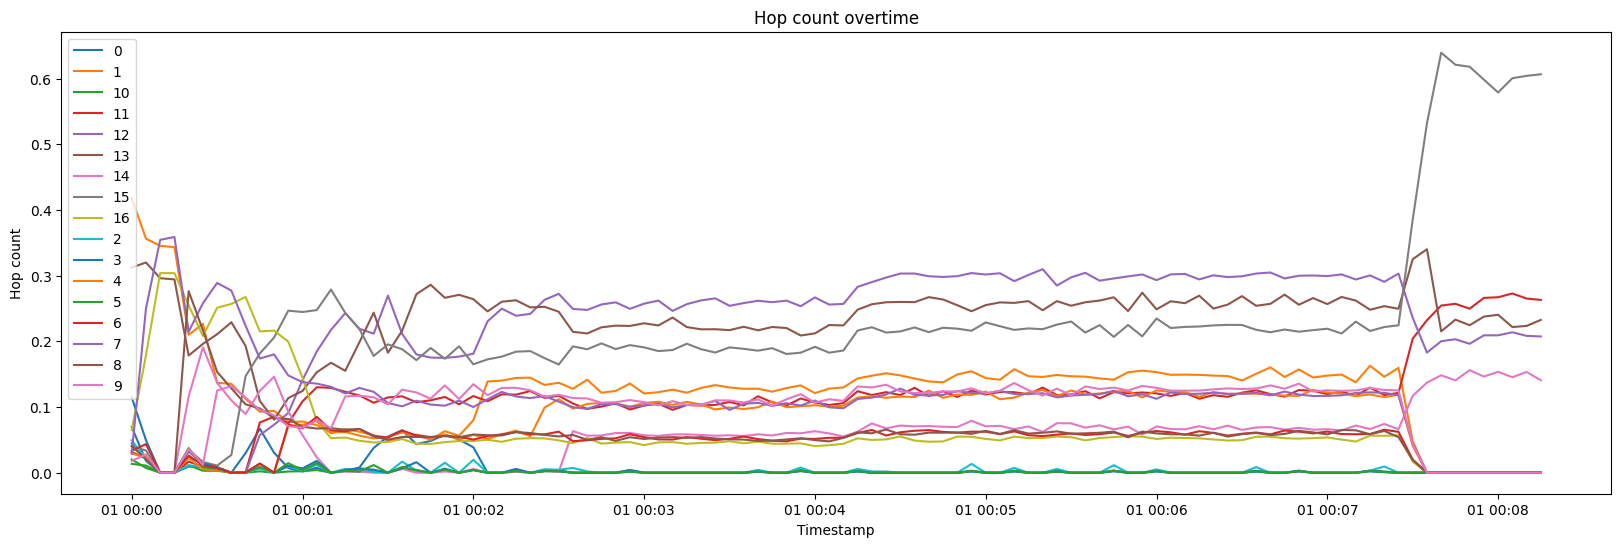

In [258]:
hop = events_over_time[['Timestamp', 'Hop Count', 'Source Node']] 
hop_grouped = hop.groupby(['Timestamp', 'Source Node']).size().reset_index(name='Count')
hop_pivot = hop_grouped.pivot(index='Timestamp', columns='Source Node', values='Count')
hop_pivot.index = pd.to_datetime(hop_pivot.index, unit='s')
hop_pivot_resampled = hop_pivot.resample('5S').mean()

plt.figure(figsize=(20, 6))
for column in hop_pivot_resampled:
        plt.plot(hop_pivot_resampled.index, hop_pivot_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel("Hop count")
plt.title("Hop count overtime")
plt.legend()
plt.show()

Node 16 has the highest average hop count, suggesting that packets originating or destined for this node go through more intermediaries than those from other nodes.

4. Check Request Status per node

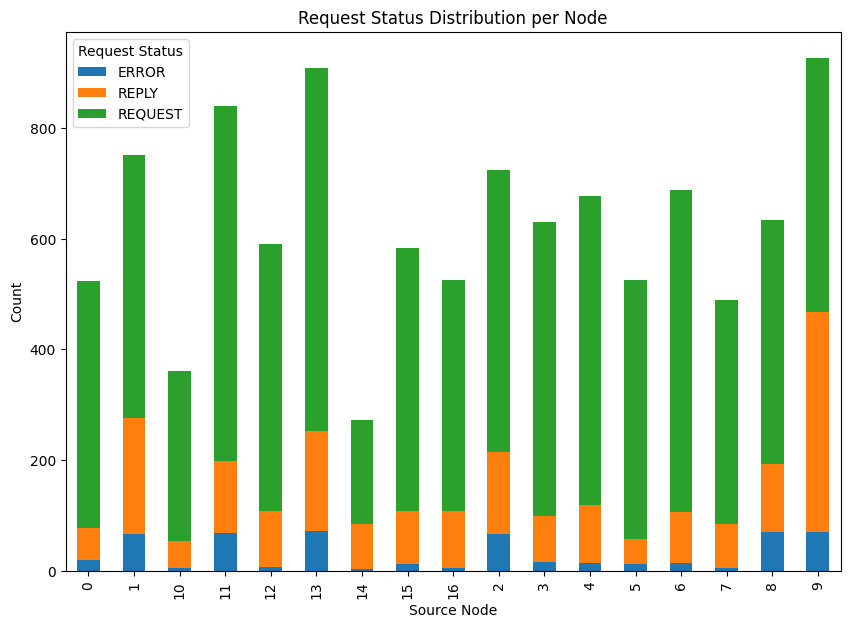

In [259]:
grouped_request = ns2_trace_df.groupby('Source Node')['Request Status'].value_counts().unstack().fillna(0)
grouped_request.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Request Status Distribution per Node')
plt.ylabel('Count')
plt.show()


5. Visualize the Ratio of Failed Requests

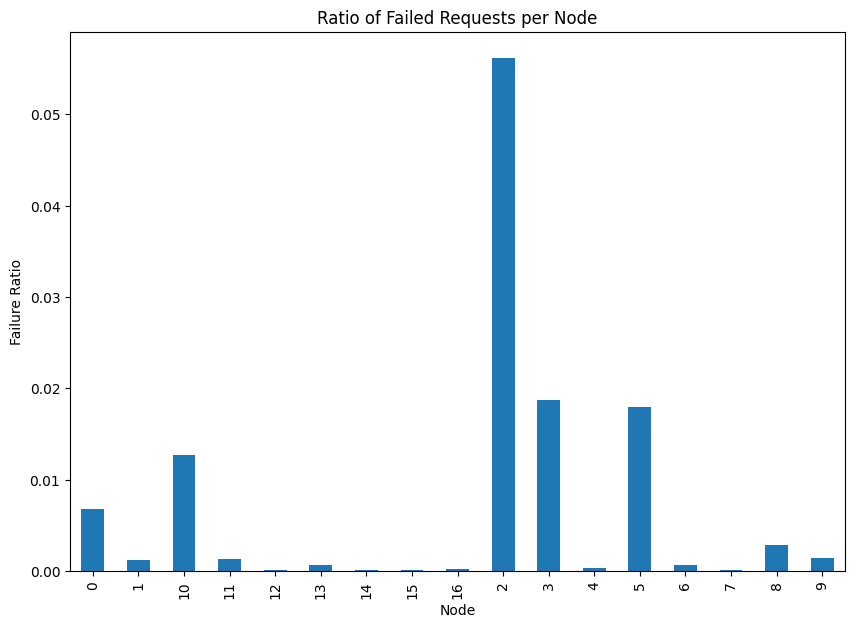

In [260]:
grouped_ratio = ns2_trace_df.groupby('Source Node').apply(lambda x: x[x['Request Status'] == 'ERROR'].shape[0] / x.shape[0])
grouped_ratio.plot(kind='bar', figsize=(10, 7))
plt.title('Ratio of Failed Requests per Node')
plt.ylabel('Failure Ratio')
plt.xlabel('Node')
plt.show()

In [261]:
compartive_data_frame = ns2_trace_df

Compare numeric variable statistics for each node

In [262]:
compartive_data_frame['Source Node Int'] = compartive_data_frame['Source Node'].astype(int)
result = compartive_data_frame.groupby('Source Node Int').describe()
result.sort_index(ascending=False, inplace=True)
result

Timestamp                                                                                   Node Position (x)                                                                                    Node Position (y)                                                                                     IP Source Address                                                                IP Destination Address                                                             IP Packet Length                                                           IP Flow ID                                    IP Identifier                                                                        IP Time to Live (TTL)                                                     Hop Count                                              Broadcast                                                    Destination Sequence Number                                                  Source Sequence Number                                                 Source IP Address                                                Source Sequence Number Status                                                     
                    count        mean         std       min         25%         50%         75%         max             count        mean        std         min         25%         50%         75%         max             count        mean         std         min         25%         50%         75%         max             count       mean       std    min     25%     50%     75%        max                  count       mean       std    min     25%     50%     75%     max            count        mean         std   min    25%    50%    75%    max      count mean  std  min  25%  50%  75%  max         count          mean           std  min       25%      50%       75%      max                 count       mean        std  min    25%   50%   75%   max     count      mean       std  min  25%  50%  75%  max     count       mean        std  min  25%   50%    75%   max                       count      mean       std  min   25%   50%   75%   max                  count      mean        std  min  25%  50%   75%   max             count      mean       std  min   25%  50%  75%   max                         count       mean        std  min   25%   50%    75%    max
Source Node Int                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
16                25231.0  205.726501  134.110031  2.557803   70.131836  194.832733  323.825653  450.983063           25231.0  207.373672  65.924942  167.179993  174.070007  174.070007  174.070007  428.070007           25231.0  384.384338  117.437599    6.430000  443.950012  443.950012  443.950012  443.950012           12588.0   2.851178  3.508390  0.255   1.000   1.000   4.255  16.254999                12588.0   3.626866  3.508500 -1.255   2.000   2.000   2.000  16.000          12588.0  511.519867   95.349693

Node 16 stands out in most metrics, indicating it might have a more active or central role in the network than the other nodes.

Compare non-numeric variable statistics for each node

In [263]:
compartive_data_frame['Source Node Int'] = compartive_data_frame['Source Node'].astype(int)
result = compartive_data_frame.groupby('Source Node Int').describe(include='category')
result.sort_index(ascending=False, inplace=True)
result

Event type                   Source Node                    Destination Node                   Network Layer                    Link Layer                    MAC State                     MAC State Info 1                         MAC State Info 2                   MAC State Info 3                    IP Packet Type                     Protocol                    Type                  Request Status                     
                     count unique top   freq       count unique top    freq            count unique top   freq         count unique  top   freq      count unique  top   freq     count unique   top   freq            count unique       top   freq            count unique top   freq            count unique  top   freq          count unique   top   freq    count unique   top freq count unique  top freq          count unique      top freq
Source Node Int                                                                                                                                                                                                                                                                                                                                                                                                                                     
16                   25231      4   r  12942       25231      1  16   25231            25231     12  -2  13423         25231      3  MAC  17002      25231      3  ---  21282     25231     10   13a  12124            25231     13        10  16432            25231     17   1  12585            25231      3    0  12640          12588      2   cbr  12062      575      2  aodv  526   526      3  0x2  418            526      3  REQUEST  418
15                   95452      3   s  52698       95452      1  15   95452            95452     12  -2  85945         95452      4  MAC  60991      95452      4  ---  85226     95452     10  144e  34696            95452     14         0  39999            95452     17   f  36612            95452      3    0  72834          44592      2   cbr  44009      629      2  aodv  583   583      3  0x2  475            583      3  REQUEST  475
14                   25146      3   s  14797       25146      1  14   25146            25146     13  -2  23745         25146      4  MAC  15859      25146      5  ---  24544     25146     10     0  11710            25146     14         f   8379            25146     17   0  14664            25146      3    0  20797          12626      2   cbr  12353      311      2  aodv  273   273      3  0x2  189            273      3  REQUEST  189
13                  103317      4   s  50229      103317      1  13  103317           103317     11  -2  73095        103317      3  MAC  72933     103317      4  ---  86517    103317      9   13a  33419           103317     12         d  42358           103317     17   0  30225           103317      3    0  69126          44166      2   cbr  43257      957      2  aodv  909   909      3  0x2  657            909      3  REQUEST  657
12                  109256      4   r  56592      109256      1  12  109256           109256     12  -2  56860        109256      3  MAC  75280     109256      3  ---  93959    109256      8   13a  52348           109256     12         c  71368           109256     17   0  37410           109256      3    0  56379          52878      2   cbr  52288      636      2  aodv  590   590      3  0x2  482            590      3  REQUEST  482
11                   51317      4   s  28959       51317      1  11   51317            51317      6  -2  36817         51317      3  MAC  29551      51317      2  ---  51263     51317      8     0  29329            51317     14         0  21352            51317     16   0  35846            51317      3    0  43256          29360      2   cbr  28520      893      2  aodv  840   840      3  0x2  642            840      3  REQUEST  642
10                     474      3   r    328         474      1  10     474        

# Stage 5 Feature Engineering


- Note that with this specific problem, we cannot treat the data in terms of individual rows. If we only look at an individual row in the trace file, this tells us nothing. As is shown in the EDA section, it is only through analysing the trends for each node (looking at multiple observations for a given node) that we can then observe the behaviour of a node and make a prediction for whether or not its behaviour is malicious and consequently weather or not it is a black hole node.

    - <b>Therefore, feature engineering is crucial.</b>
<br>
<br>
<br>
- In the reality of this problem implementation, we would define a period of time which is enough to collect enough data to make a good assumption but not too long so that the black hole nodes can be stopped, minimising the amount of data that is lost. Taking action to prevent the BHN from further damage might look something like blacklisting a node if its behaviour is deemed to be malicious.

    - <b>Therefore, we need to determine the optimal time period to gather data for each node.</b>
    - <b>Aggregating the data also has the added benefit of dimensionality reduction on our large ~1000000 rows of data.</b>
<br>
<br>
<br>
- This will almost be creating a running reputation score for each node and after a certain period of time at given intervals, these scores are evaluated, and a decision made whether or not to blacklist the nodes.

    - <b>This functionality (having a running reputation score) will have to be considered when this model is deployed.</b>



In [264]:
ns2_trace_df_memory = pd.read_pickle('ns2_trace_df.pkl')

In [265]:
ns2_trace_df_memory[:10]

,Event type,Timestamp,Source Node,Destination Node,Node Position (x),Node Position (y),Network Layer,Link Layer,MAC State,MAC State Info 1,MAC State Info 2,MAC State Info 3,IP Source Address,IP Destination Address,IP Packet Type,IP Packet Length,IP Flow ID,IP Identifier,IP Time to Live (TTL),Protocol,Type,Hop Count,Broadcast,Destination Sequence Number,Source Sequence Number,Source IP Address,Source Sequence Number Status,Request Status
0,s,2.556839,1,-2,297.179993,463.160004,AGT,---,0,0,0,0,1.000,2.000,cbr,512.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r,2.556839,1,-2,297.179993,463.160004,RTR,---,0,0,0,0,1.000,2.000,cbr,512.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s,2.556839,1,-2,297.179993,463.160004,RTR,---,0,0,0,0,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
3,s,2.556954,1,-2,297.190002,463.160004,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,106.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
4,r,2.557802,13,-2,294.339996,420.510010,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
5,r,2.557802,14,-2,348.489990,445.339996,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
6,r,2.557802,0,-2,261.709991,415.429993,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
7,r,2.557802,10,-2,412.170013,495.549988,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
8,r,2.557803,16,-2,167.179993,266.630005,MAC,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST
9,r,2.557827,13,-2,294.339996,420.510010,RTR,---,0,ffffffff,1,800,1.255,-1.255,AODV,48.0,0.0,0.0,30.0,aodv,0x2,1.0,1.0,2.0,0.0,1.0,4.0,REQUEST


Handle class imbalance

In [266]:
ns2_trace_df_memory['target'] = ns2_trace_df_memory['Source Node'].apply(lambda x: 1 if x == "16" or x == "15" or x == "14" or x == "13" or x == "12" else 0)
print("Class counts: ",ns2_trace_df_memory['target'].value_counts())

# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_trace_over, y_trace_over = oversample.fit_resample(ns2_trace_df_memory, ns2_trace_df_memory['target'])
# print("Class counts: ",y_trace_over.value_counts())

Class counts:  target
1    358402
0    296252
Name: count, dtype: int64


Prepare data for summary level

In [267]:
import warnings
# Ignore specific warning
warnings.filterwarnings("ignore")




#'Event type':
# ---------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in ns2_trace_df_memory['Event type'].unique():
    ns2_trace_df_memory['Event-count-'+str(value)] = ns2_trace_df_memory['Event type'].apply(lambda x: 1 if x == value else 0)

X_trace_over = ns2_trace_df_memory.drop(columns=['Event type'])

#'Timestamp':
# ----------------------------------------------- (std of timestamp-std and mean of timestamp-mean)
# 'std', # std, mean
X_trace_over['Timestamp-std'] = X_trace_over['Timestamp']
X_trace_over['Timestamp-mean'] = X_trace_over['Timestamp']

#'Source Node':
# ------------------------------------------------- (unique of Source-Node-unique)
# unique, 
X_trace_over['Source-Node-unique'] = X_trace_over['Source Node']

#'Destination Node':
# -------------------------------------------------- (unique of Destination-Node-unique)
# unique,
X_trace_over['Destination-Node-unique'] = X_trace_over['Destination Node']
X_trace_over = X_trace_over.drop(columns=['Destination Node'])

#'Node Position (x)':
# --------------------------------------------------(std of Node-x-std and mean of Node-x-mean)
# mean, std
X_trace_over['Node-x-std'] = X_trace_over['Node Position (x)']
X_trace_over['Node-x-mean'] = X_trace_over['Node Position (x)']
X_trace_over = X_trace_over.drop(columns=['Node Position (x)'])

#'Node Position (y)':
# ---------------------------------------------------- (std of Node-y-std and mean of Node-y-mean)
# mean, std
X_trace_over['Node-y-std'] = X_trace_over['Node Position (y)']
X_trace_over['Node-y-mean'] = X_trace_over['Node Position (y)']
X_trace_over = X_trace_over.drop(columns=['Node Position (y)'])

#'Network Layer':
# ------------------------------------------------------ (sum all new columns to get total counts)
# count each class
for value in X_trace_over['Network Layer'].unique():
    X_trace_over['Layer-count-'+str(value)] = X_trace_over['Network Layer'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['Network Layer'])

#'Link Layer':
# ------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['Link Layer'].unique():
    X_trace_over['Link-count-'+str(value)] = X_trace_over['Link Layer'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['Link Layer'])

#'MAC State':
# -------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['MAC State'].unique():
    X_trace_over['MAC-state-count-'+str(value)] = X_trace_over['MAC State'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['MAC State'])

#'MAC State Info 1':
# --------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['MAC State Info 1'].unique():
    X_trace_over['MAC-info-1-count-'+str(value)] = X_trace_over['MAC State Info 1'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['MAC State Info 1'])

#'MAC State Info 2':
# ---------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['MAC State Info 2'].unique():
    X_trace_over['MAC-info-2-count-'+str(value)] = X_trace_over['MAC State Info 2'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['MAC State Info 2'])

#'MAC State Info 3':
# ---------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['MAC State Info 3'].unique():
    X_trace_over['MAC-info-3-count-'+str(value)] = X_trace_over['MAC State Info 3'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['MAC State Info 3'])

#'IP Source Address':
# ----------------------------------------------------------- (unique of IP-Source-Address-unique and std of IP-Source-Address-std)
# unique,std
X_trace_over['IP-Source-Address-unique'] = X_trace_over['IP Source Address']
X_trace_over['IP-Source-Address-std'] = X_trace_over['IP Source Address']
X_trace_over = X_trace_over.drop(columns=['IP Source Address'])

#'IP Destination Address':
# ------------------------------------------------------------ (unique of IP-Source-Address-unique and std of IP-Source-Address-std)
# unique,std
X_trace_over['IP-Destination-Address-unique'] = X_trace_over['IP Destination Address']
X_trace_over['IP-Destination-Address-std'] = X_trace_over['IP Destination Address']
X_trace_over = X_trace_over.drop(columns=['IP Destination Address'])

#'IP Packet Type':
# ------------------------------------------------------------ (sum all new columns to get total counts)
# count each class
for value in X_trace_over['IP Packet Type'].unique():
    X_trace_over['IP-packet-type-count-'+str(value)] = X_trace_over['IP Packet Type'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['IP Packet Type'])

#'IP Packet Length':
# ------------------------------------------------------------- (sum of IP-Packet-Length-total, unique of IP-Packet-Length-unique, std of IP-Packet-Length-std, max of IP-Packet-Length-max, min of IP-Packet-Length-min, mean of IP-Packet-Length-mean)
# total, unique, std, max, min, mean
X_trace_over['IP-Packet-Length-total'] = X_trace_over['IP Packet Length']
X_trace_over['IP-Packet-Length-unique'] = X_trace_over['IP Packet Length']
X_trace_over['IP-Packet-Length-std'] = X_trace_over['IP Packet Length']
X_trace_over['IP-Packet-Length-min'] = X_trace_over['IP Packet Length']
X_trace_over['IP-Packet-Length-max'] = X_trace_over['IP Packet Length']
X_trace_over['IP-Packet-Length-mean'] = X_trace_over['IP Packet Length']
X_trace_over = X_trace_over.drop(columns=['IP Packet Length'])

#'IP Flow ID':
# --------------------------------------------------------------(count of IP-Flow-count)
# count
X_trace_over['IP-Flow-count'] = X_trace_over['IP Flow ID']
X_trace_over = X_trace_over.drop(columns=['IP Flow ID'])

#'IP Identifier':
# ------------------------------------------------------------- (unique of IP-identifier-unique and std of IP-identifier-std)
# unique, std
X_trace_over['IP-identifier-unique'] = X_trace_over['IP Identifier']
X_trace_over['IP-identifier-std'] = X_trace_over['IP Identifier']
X_trace_over = X_trace_over.drop(columns=['IP Identifier'])

#'IP Time to Live (TTL)':
# -------------------------------------------------------------- (sum of TTL-total, unique of TTL-unique, std of TTL-std, max of TTL-max, min of TTL-min, mean of TTL-mean))
# total, unique, min, max ,std, mean
X_trace_over['TTL-total'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over['TTL-unique'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over['TTL-std'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over['TTL-min'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over['TTL-max'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over['TTL-mean'] = X_trace_over['IP Time to Live (TTL)']
X_trace_over = X_trace_over.drop(columns=['IP Time to Live (TTL)'])

#'Protocol':
# -------------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['Protocol'].unique():
    X_trace_over['Protocol-count-'+str(value)] = X_trace_over['Protocol'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['Protocol'])

#'Type':
# -------------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['Type'].unique():
    X_trace_over['Type-count-'+str(value)] = X_trace_over['Type'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['Type'])

#'Hop Count':
# -------------------------------------------------------------- (sum of Hop-total, unique of Hop-unique, std of Hop-std, max of Hop-max, min of Hop-min, mean of Hop-mean)))
# total, unique, min, max ,std, mean
X_trace_over['Hop-total'] = X_trace_over['Hop Count']
X_trace_over['Hop-unique'] = X_trace_over['Hop Count']
X_trace_over['Hop-std'] = X_trace_over['Hop Count']
X_trace_over['Hop-min'] = X_trace_over['Hop Count']
X_trace_over['Hop-max'] = X_trace_over['Hop Count']
X_trace_over['Hop-mean'] = X_trace_over['Hop Count']
X_trace_over = X_trace_over.drop(columns=['Hop Count'])


#'Broadcast':
# --------------------------------------------------------------- (sum of Broadcast-total, unique of Broadcast-unique, std of Broadcast-std, max of Broadcast-max, min of Broadcast-min, mean of Broadcast-mean)))
# total, unique, min, max ,std, mean
X_trace_over['Broadcast-total'] = X_trace_over['Broadcast']
X_trace_over['Broadcast-unique'] = X_trace_over['Broadcast']
X_trace_over['Broadcast-std'] = X_trace_over['Broadcast']
X_trace_over['Broadcast-min'] = X_trace_over['Broadcast']
X_trace_over['Broadcast-max'] = X_trace_over['Broadcast']
X_trace_over['Broadcast-mean'] = X_trace_over['Broadcast']
X_trace_over = X_trace_over.drop(columns=['Broadcast'])

#'Destination Sequence Number':
# ---------------------------------------------------------------- (unique of DSN-unique, std of DSN-std)
# unique, std
X_trace_over['DSN-unique'] = X_trace_over['Destination Sequence Number']
X_trace_over['DSN-std'] = X_trace_over['Destination Sequence Number']
X_trace_over = X_trace_over.drop(columns=['Destination Sequence Number'])

#'Source Sequence Number':
# ----------------------------------------------------------------- (unique of SSN-unique, std of SSN-std)
# unique, std
X_trace_over['SSN-unique'] = X_trace_over['Source Sequence Number']
X_trace_over['SSN-std'] = X_trace_over['Source Sequence Number']
X_trace_over = X_trace_over.drop(columns=['Source Sequence Number'])

#'Source IP Address':
# ----------------------------------------------------------------- (unique of SIP-unique, std of SIP-std)
# unique, std
X_trace_over['SIP-unique'] = X_trace_over['Source IP Address']
X_trace_over['SIP-std'] = X_trace_over['Source IP Address']
X_trace_over = X_trace_over.drop(columns=['Source IP Address'])

#'Source Sequence Number Status':
# ------------------------------------------------------------------ (unique of SSN-status-unique, std of SSN-status-std,mean of SSN-status-mean)
# unique, std, mean
X_trace_over['SSN-status-unique'] = X_trace_over['Source Sequence Number Status']
X_trace_over['SSN-status-std'] = X_trace_over['Source Sequence Number Status']
X_trace_over['SSN-status-mean'] = X_trace_over['Source Sequence Number Status']
X_trace_over = X_trace_over.drop(columns=['Source Sequence Number Status'])

#'Request Status':
# ----------------------------------------------------------------- (sum all new columns to get total counts)
# count each class
for value in X_trace_over['Request Status'].unique():
    X_trace_over['Request-status-count-'+str(value)] = X_trace_over['Request Status'].apply(lambda x: 1 if x == value else 0)
X_trace_over = X_trace_over.drop(columns=['Request Status'])

X_trace_over_summary = X_trace_over

In [268]:
print(X_trace_over_summary.shape)
print(X_trace_over_summary[:10])

(654654, 128)
   Timestamp Source Node  target  Event-count-s  Event-count-r  Event-count-f  Event-count-d  Timestamp-std  Timestamp-mean Source-Node-unique Destination-Node-unique  Node-x-std  Node-x-mean  Node-y-std  Node-y-mean  Layer-count-AGT  Layer-count-RTR  Layer-count-MAC  Layer-count-IFQ  Link-count----  Link-count-COL  Link-count-LOOP  Link-count-RET  Link-count-CBK  Link-count-TTL  Link-count-ARP  MAC-state-count-0  MAC-state-count-52e  MAC-state-count-3f4  MAC-state-count-13a  MAC-state-count-5ae  MAC-state-count-474  MAC-state-count-14ee  MAC-state-count-13b4  MAC-state-count-144e  MAC-state-count-1314  MAC-info-1-count-0  MAC-info-1-count-ffffffff  MAC-info-1-count-d  MAC-info-1-count-1  MAC-info-1-count-c  MAC-info-1-count-3  MAC-info-1-count-2  MAC-info-1-count-e  MAC-info-1-count-10  MAC-info-1-count-f  MAC-info-1-count-7  MAC-info-1-count-6  MAC-info-1-count-9  MAC-info-1-count-8  MAC-info-1-count-5  MAC-info-1-count-b  MAC-info-1-count-4  MAC-info-1-count-a  MAC-inf

Group observations into time ranges

In [326]:
X_trace_over_summary['Timestamp'] = pd.to_datetime(X_trace_over_summary['Timestamp'], unit='ms')
X_trace_over_summary['Protocol-count-arp'] = X_trace_over_summary['Protocol-count-arp'].astype('float')
X_trace_over_summary['Protocol-count-aodv'] = X_trace_over_summary['Protocol-count-aodv'].astype('float')
X_trace_over_summary['IP-packet-type-count-cbr'] = X_trace_over_summary['IP-packet-type-count-cbr'].astype('float')
X_trace_over_summary['IP-packet-type-count-AODV'] = X_trace_over_summary['IP-packet-type-count-AODV'].astype('float')

if 'Protocol-count-nan' in X_trace_over_summary.columns:
    X_trace_over_summary = X_trace_over_summary.drop(columns=['Protocol-count-nan'])

aggregations = {

    'Event-count-s': 'mean',
    'Event-count-r': 'mean',
    'Event-count-d': 'mean',
    'Event-count-f': 'mean',

    'Timestamp-std': 'std',
    'Timestamp-mean': 'mean',

    'Source-Node-unique': 'nunique',

    'Destination-Node-unique': 'nunique',

    'Node-x-std': 'std',
    'Node-x-mean': 'mean',

    'Node-y-std': 'std',
    'Node-y-mean': 'mean',

    'Layer-count-AGT': 'mean',
    'Layer-count-RTR': 'mean',
    'Layer-count-MAC': 'mean',
    'Layer-count-IFQ': 'mean',

    'Link-count----': 'mean',
    'Link-count-LOOP': 'mean',
    'Link-count-COL': 'mean',
    'Link-count-RET': 'mean',
    'Link-count-CBK': 'mean',
    'Link-count-TTL': 'mean',
    #'Link-count-NRTE': 'mean',
    'Link-count-ARP': 'mean',

    'MAC-state-count-0': 'mean',
    'MAC-state-count-52e': 'mean',
    'MAC-state-count-3f4': 'mean',
    'MAC-state-count-13a': 'mean',
    'MAC-state-count-5ae': 'mean',
    'MAC-state-count-474': 'mean',
    'MAC-state-count-14ee': 'mean',
    'MAC-state-count-13b4': 'mean',

    'MAC-info-1-count-0': 'mean',
    'MAC-info-1-count-ffffffff': 'mean',
    'MAC-info-1-count-10': 'mean',
    'MAC-info-1-count-1': 'mean',
    'MAC-info-1-count-2': 'mean',
    'MAC-info-1-count-3': 'mean',
    'MAC-info-1-count-d': 'mean',
    'MAC-info-1-count-6': 'mean',
    'MAC-info-1-count-7': 'mean',
    'MAC-info-1-count-9': 'mean',
    'MAC-info-1-count-8': 'mean',
    'MAC-info-1-count-4': 'mean',
    'MAC-info-1-count-b': 'mean',
    'MAC-info-1-count-f': 'mean',
    'MAC-info-1-count-e': 'mean',
    'MAC-info-1-count-5': 'mean',
    'MAC-info-1-count-c': 'mean',
    'MAC-info-1-count-a': 'mean',

    'MAC-info-2-count-0': 'mean',
    'MAC-info-2-count-1': 'mean',
    'MAC-info-2-count-10': 'mean',
    'MAC-info-2-count-d': 'mean',
    'MAC-info-2-count-a': 'mean',
    'MAC-info-2-count-e': 'mean',
    'MAC-info-2-count-3': 'mean',
    'MAC-info-2-count-2': 'mean',
    'MAC-info-2-count-7': 'mean',
    'MAC-info-2-count-b': 'mean',
    'MAC-info-2-count-f': 'mean',
    'MAC-info-2-count-8': 'mean',
    'MAC-info-2-count-4': 'mean',
    'MAC-info-2-count-c': 'mean',
    'MAC-info-2-count-6': 'mean',
    'MAC-info-2-count-5': 'mean',
    'MAC-info-2-count-9': 'mean',

    'MAC-info-3-count-0': 'mean',
    'MAC-info-3-count-800': 'mean',
    'MAC-info-3-count-806': 'mean',

    'IP-Source-Address-unique': 'nunique',
    'IP-Source-Address-std': 'std',

    'IP-Destination-Address-unique': 'nunique',
    'IP-Destination-Address-std': 'std',

    'IP-packet-type-count-cbr': 'mean',
    'IP-packet-type-count-AODV': 'mean',
    'IP-packet-type-count-nan': 'mean',
    
    'IP-Packet-Length-total': 'mean',
    'IP-Packet-Length-unique': 'nunique',
    'IP-Packet-Length-std': 'std',
    'IP-Packet-Length-min': 'min',
    'IP-Packet-Length-max': 'max',
    'IP-Packet-Length-mean': 'mean',

    'IP-Flow-count': 'count',

    'IP-identifier-unique': 'nunique',
    'IP-identifier-std': 'std',

    'TTL-unique': 'nunique',
    'TTL-std': 'std',
    'TTL-min': 'min',
    'TTL-max': 'max',
    'TTL-mean': 'mean',

    'Protocol-count-aodv': 'mean',
    'Protocol-count-arp': 'mean',

    'Type-count-nan': 'mean',
    'Type-count-0x2': 'mean',
    'Type-count-0x4': 'mean',
    'Type-count-0x8': 'mean',

    'Hop-unique': 'nunique',
    'Hop-std': 'std',
    'Hop-min': 'min',
    'Hop-max': 'max',
    'Hop-mean': 'mean',

    'Broadcast-unique': 'nunique',
    'Broadcast-std': 'std',
    'Broadcast-min': 'min',
    'Broadcast-max': 'max',
    'Broadcast-mean': 'mean',

    'DSN-unique': 'nunique',
    'DSN-std': 'std',

    'SSN-unique': 'nunique',
    'SSN-std': 'std',

    'SIP-unique': 'nunique',
    'SIP-std': 'std',

    'SSN-status-unique': 'nunique',
    'SSN-status-std': 'std',
    'SSN-status-mean': 'mean',

    'Request-status-count-nan': 'mean',
    'Request-status-count-REQUEST': 'mean',
    'Request-status-count-REPLY': 'mean',
    'Request-status-count-ERROR': 'mean'

}

trace_sections = X_trace_over_summary.groupby(['Source Node', pd.Grouper(key='Timestamp', freq='15ms')]).agg(aggregations)

Additional feature engineering ideas to consider

- Radio between received and forwarded events
- Most dominant source node
- Most dominant destination node
- Most dominant IP Source Address
- Most dominant IP Destination Address
- Most dominant IP Identifier
- Most dominant IP Destination Sequence Number
- Most dominant IP Source IP Address
- Most dominant IP Source Sequence Number Status


In [327]:
trace_sections[:10]

Event-count-s  Event-count-r  Event-count-d  Event-count-f  Timestamp-std  Timestamp-mean  Source-Node-unique  Destination-Node-unique  Node-x-std  Node-x-mean  Node-y-std  Node-y-mean  Layer-count-AGT  Layer-count-RTR  Layer-count-MAC  Layer-count-IFQ  Link-count----  Link-count-LOOP  Link-count-COL  Link-count-RET  Link-count-CBK  Link-count-TTL  Link-count-ARP  MAC-state-count-0  MAC-state-count-52e  MAC-state-count-3f4  MAC-state-count-13a  MAC-state-count-5ae  MAC-state-count-474  MAC-state-count-14ee  MAC-state-count-13b4  MAC-info-1-count-0  MAC-info-1-count-ffffffff  MAC-info-1-count-10  MAC-info-1-count-1  MAC-info-1-count-2  MAC-info-1-count-3  MAC-info-1-count-d  MAC-info-1-count-6  MAC-info-1-count-7  MAC-info-1-count-9  MAC-info-1-count-8  MAC-info-1-count-4  MAC-info-1-count-b  MAC-info-1-count-f  MAC-info-1-count-e  MAC-info-1-count-5  MAC-info-1-count-c  MAC-info-1-count-a  MAC-info-2-count-0  MAC-info-2-count-1  MAC-info-2-count-10  MAC-info-2-count-d  MAC-info-2-count-a  MAC-info-2-count-e  MAC-info-2-count-3  MAC-info-2-count-2  MAC-info-2-count-7  MAC-info-2-count-b  MAC-info-2-count-f  MAC-info-2-count-8  MAC-info-2-count-4  MAC-info-2-count-c  MAC-info-2-count-6  MAC-info-2-count-5  MAC-info-2-count-9  MAC-info-3-count-0  MAC-info-3-count-800  MAC-info-3-count-806  IP-Source-Address-unique  IP-Source-Address-std  IP-Destination-Address-unique  IP-Destination-Address-std  IP-packet-type-count-cbr  IP-packet-type-count-AODV  IP-packet-type-count-nan  IP-Packet-Length-total  IP-Packet-Length-unique  IP-Packet-Length-std  IP-Packet-Length-min  IP-Packet-Length-max  IP-Packet-Length-mean  IP-Flow-count  IP-identifier-unique  IP-identifier-std  TTL-unique    TTL-std  TTL-min  TTL-max   TTL-mean  Protocol-count-aodv  Protocol-count-arp  Type-count-nan  Type-count-0x2  Type-count-0x4  Type-count-0x8  Hop-unique   Hop-std  Hop-min  Hop-max  Hop-mean  Broadcast-unique  Broadcast-std  Broadcast-min  Broadcast-max  Broadcast-mean  DSN-unique   DSN-std  SSN-unique    SSN-std  SIP-unique   SIP-std  SSN-status-unique  SSN-status-std  SSN-status-mean  Request-status-count-nan  Request-status-count-REQUEST  Request-status-count-REPLY  Request-status-count-ERROR
Source Node Timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [322]:
row_level_count = len(X_trace_over_summary)
section_level_count = len(trace_sections)
grouping_amount = round(row_level_count / section_level_count, 0)

print(f"Row level count: {row_level_count}")
print(f"Section level count: {section_level_count}")
print("Per grouping count: ", grouping_amount)
print(f"{section_level_count} groups of {grouping_amount} observations")

trace_sections.to_pickle('trace_sections.pkl')

Row level count: 654654
Section level count: 850
Per grouping count:  770.0
850 groups of 770.0 observations


In [340]:
trace_sections = pd.read_pickle('trace_sections.pkl')
# reset the index of trace_sections
trace_sections = trace_sections.reset_index()


trace_sections[:10]

,Source Node,Timestamp,Event-count-s,Event-count-r,Event-count-d,Event-count-f,Timestamp-std,Timestamp-mean,Source-Node-unique,Destination-Node-unique,Node-x-std,Node-x-mean,Node-y-std,Node-y-mean,Layer-count-AGT,Layer-count-RTR,Layer-count-MAC,Layer-count-IFQ,Link-count----,Link-count-LOOP,Link-count-COL,Link-count-RET,Link-count-CBK,Link-count-TTL,Link-count-ARP,MAC-state-count-0,MAC-state-count-52e,MAC-state-count-3f4,MAC-state-count-13a,MAC-state-count-5ae,MAC-state-count-474,MAC-state-count-14ee,MAC-state-count-13b4,MAC-info-1-count-0,MAC-info-1-count-ffffffff,MAC-info-1-count-10,MAC-info-1-count-1,MAC-info-1-count-2,MAC-info-1-count-3,MAC-info-1-count-d,MAC-info-1-count-6,MAC-info-1-count-7,MAC-info-1-count-9,MAC-info-1-count-8,MAC-info-1-count-4,MAC-info-1-count-b,MAC-info-1-count-f,MAC-info-1-count-e,MAC-info-1-count-5,MAC-info-1-count-c,MAC-info-1-count-a,MAC-info-2-count-0,MAC-info-2-count-1,MAC-info-2-count-10,MAC-info-2-count-d,MAC-info-2-count-a,MAC-info-2-count-e,MAC-info-2-count-3,MAC-info-2-count-2,MAC-info-2-count-7,MAC-info-2-count-b,MAC-info-2-count-f,MAC-info-2-count-8,MAC-info-2-count-4,MAC-info-2-count-c,MAC-info-2-count-6,MAC-info-2-count-5,MAC-info-2-count-9,MAC-info-3-count-0,MAC-info-3-count-800,MAC-info-3-count-806,IP-Source-Address-unique,IP-Source-Address-std,IP-Destination-Address-unique,IP-Destination-Address-std,IP-packet-type-count-cbr,IP-packet-type-count-AODV,IP-packet-type-count-nan,IP-Packet-Length-total,IP-Packet-Length-unique,IP-Packet-Length-std,IP-Packet-Length-min,IP-Packet-Length-max,IP-Packet-Length-mean,IP-Flow-count,IP-identifier-unique,IP-identifier-std,TTL-unique,TTL-std,TTL-min,TTL-max,TTL-mean,Protocol-count-aodv,Protocol-count-arp,Type-count-nan,Type-count-0x2,Type-count-0x4,Type-count-0x8,Hop-unique,Hop-std,Hop-min,Hop-max,Hop-mean,Broadcast-unique,Broadcast-std,Broadcast-min,Broadcast-max,Broadcast-mean,DSN-unique,DSN-std,SSN-unique,SSN-std,SIP-unique,SIP-std,SSN-status-unique,SSN-status-std,SSN-status-mean,Request-status-count-nan,Request-status-count-REQUEST,Request-status-count-REPLY,Request-status-count-ERROR
0,0,1970-01-01 00:00:00.000,0.282609,0.673913,0.021739,0.021739,2.435493,4.256540,1,3,46.945472,228.961304,9.461765,408.826508,0.000000,0.239130,0.760870,0.0,0.978261,0.0,0.021739,0.0,0.0,0.000000,0.0,0.695652,0.043478,0.043478,0.130435,0.043478,0.043478,0.000000,0.000000,0.217391,0.608696,0.00000,0.086957,0.0,0.086957,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.326087,0.152174,0.043478,0.043478,0.043478,0.043478,0.217391,0.000000,0.065217,0.043478,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.260870,0.500000,0.239130,8,4.783866,2,0.972759,0.000000,1.000000,0.0,57.391304,4,22.388591,44.0,106.0,57.391304,23,1,0.000000,3,0.668312,28.0,30.0,28.913044,0.676471,0.323529,0.0,0.826087,0.173913,0.000000,3,0.668312,1.0,3.0,2.086957,1,0.000000,1.0,1.0,1.000000,7,3.524930,2,0.387553,7,5.091801,1,0.000000,4.000000,0.0,0.826087,0.173913,0.000000
1,0,1970-01-01 00:00:00.010,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1970-01-01 00:00:00.020,0.153846,0.769231,0.076923,0.000000,4.267707,25.132660,1,1,25.802628,123.031158,8.260209,352.950745,0.000000,0.423077,0.576923,0.0,0.923077,0.0,0.038462,0.0,0.0,0.038462,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.076923,0.000000,0.000000,0.038462,0.000000,0.038462,0.076923,0.076923,0.153846,0.269231,0.000000,0.000000,0.000000,0.000

In [342]:
trace_sections.isna().sum()

# print the rows where all columns values are Nan or na > 80%
trace_sections[trace_sections.isna().sum(axis=1) > 80]

trace_sections = trace_sections[trace_sections.isna().sum(axis=1) < 80]
print(trace_sections.shape)
trace_sections[:10]
trace_sections['Source Node'].value_counts()

(705, 121)


Source Node
13    50
11    49
12    49
15    49
14    48
16    46
1     46
7     46
4     45
8     45
6     45
9     45
2     30
5     28
3     28
10    28
0     28
Name: count, dtype: int64

In [400]:
trace_sections['is_malicious'] = trace_sections['Source Node'].apply(lambda x: True if x == "16" or x == "15" or x == "14" or x == "13" or x == "12" else False)

print(trace_sections['is_malicious'].value_counts())

is_malicious
False    463
True     242
Name: count, dtype: int64


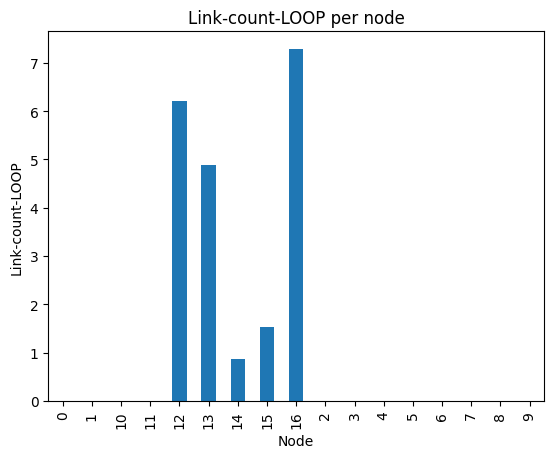

In [415]:
import matplotlib.pyplot as plt

# group the data by 'Source Node' and get the total count of 'Link-count-LOOP' for each node
loop_count = trace_sections.groupby('Source Node')['Link-count-LOOP'].sum()

# create a bar plot of the data
loop_count.plot(kind='bar')
plt.xlabel('Node')
plt.ylabel('Link-count-LOOP')
plt.title('Link-count-LOOP per node')
plt.show()


In [407]:
# exort trace sections to excel
trace_sections.to_excel('trace_sections.xlsx')

# format Event-count-s to 1 decimnal place
trace_sections['Event-count-s'] = trace_sections['Event-count-s'].apply(lambda x: round(x, 1))

In [445]:
feature_set_1 = trace_sections.drop(columns=['Source Node', 'Timestamp'])
#feature_set_1 = trace_sections[['is_malicious', 'Protocol-count-arp']]


feature_set_2 = trace_sections.drop(columns=[
    'Source Node',
    'Timestamp',
    'MAC-state-count-13a',
    'Link-count-LOOP',
    'IP-identifier-unique',
    'Link-count-RET',
    'MAC-info-1-count-e',
    'Layer-count-MAC',
    'IP-Destination-Address-unique',
    'IP-Flow-count',
    'MAC-info-1-count-10',
    'MAC-info-2-count-e',
    'MAC-info-1-count-f',

    'IP-packet-type-count-cbr',

    'MAC-info-2-count-d',
    'Timestamp-std',
    'IP-Destination-Address-std',
    'Node-x-mean',
    'MAC-info-2-count-f',
    'MAC-info-2-count-1',
    'IP-Source-Address-std',
    'MAC-info-1-count-c',
    'Timestamp-mean',
    'MAC-info-3-count-0',
    'MAC-info-2-count-7',
    'MAC-info-1-count-d',
    'MAC-info-1-count-1',
    'Node-y-std',
    'IP-Source-Address-unique',
    'MAC-info-2-count-b',
    'Node-x-std',
    'SIP-std',
    'Protocol-count-arp',
    'MAC-info-1-count-b',
    'Broadcast-min',
    'DSN-std',
    'SSN-status-mean',
    'Broadcast-mean',
    'Request-status-count-nan',
    'Type-count-nan',
    'IP-packet-type-count-nan',
    'Source-Node-unique'


])




print(feature_set_1['is_malicious'].value_counts())

check1 = feature_set_1[feature_set_1['is_malicious'] == False]
check2 = feature_set_1[feature_set_1['is_malicious'] == True]

print(check1.isna().sum())
print(check2.isna().sum())

#feature_set_1

is_malicious
False    463
True     242
Name: count, dtype: int64
Event-count-s                      0
Event-count-r                      0
Event-count-d                      0
Event-count-f                      0
Timestamp-std                      0
Timestamp-mean                     0
Source-Node-unique                 0
Destination-Node-unique            0
Node-x-std                         0
Node-x-mean                        0
Node-y-std                         0
Node-y-mean                        0
Layer-count-AGT                    0
Layer-count-RTR                    0
Layer-count-MAC                    0
Layer-count-IFQ                    0
Link-count----                     0
Link-count-LOOP                    0
Link-count-COL                     0
Link-count-RET                     0
Link-count-CBK                     0
Link-count-TTL                     0
Link-count-ARP                     0
MAC-state-count-0                  0
MAC-state-count-52e                0
MAC-state-

In [446]:
correlation_matrix = feature_set_2.corr()
df = correlation_matrix['is_malicious'].sort_values(ascending=False)
df_percentage = (df * 100).round(2)

df_formatted = pd.DataFrame({
    'Feature': df_percentage.index,
    'Correlation with is_malicious (%)': df_percentage.values
})

df_formatted = df_formatted.style.format({
    'Feature': '<div style="text-align:left">{}</div>',
    'Correlation with is_malicious (%)': '<div style="text-align:left">{}</div>'
})

df_formatted

,Feature,Correlation with is_malicious (%)
0,is_malicious,100.0
1,Event-count-d,66.33
2,TTL-mean,30.8
3,IP-Packet-Length-total,30.31
4,IP-Packet-Length-mean,30.31
5,Layer-count-IFQ,29.12
6,Hop-std,27.63
7,Type-count-0x4,22.32
8,Request-status-count-REPLY,22.32
9,IP-Packet-Length-max,22.1


# Stage 6 Modeling

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

ns2_trace_opt_df_features = feature_set_2.drop(columns=['is_malicious'])
print(ns2_trace_opt_df_features.columns)
ns2_trace_opt_df_target = feature_set_2['is_malicious']

# replace True with 1 in ns2_trace_opt_df_target
ns2_trace_opt_df_target = ns2_trace_opt_df_target.replace(True, 1)
ns2_trace_opt_df_target = ns2_trace_opt_df_target.replace(False, 0)

ns2_trace_opt_df_features = ns2_trace_opt_df_features.reset_index()
ns2_trace_opt_df_target = ns2_trace_opt_df_target.reset_index()

X_train, X_test, y_train, y_test = train_test_split(ns2_trace_opt_df_features, ns2_trace_opt_df_target, test_size = 0.2, random_state = 42)



print(X_train.shape)
# send X_train to csv
X_train.to_csv('X_train.csv')

print(X_test.shape)
print(y_train.shape)
y_train.to_csv('y_train.csv')

print(y_test.shape)
print(ns2_trace_opt_df_features[:10])
print(ns2_trace_opt_df_target[:10])


Index(['Event-count-s', 'Event-count-r', 'Event-count-d', 'Event-count-f',
       'Destination-Node-unique', 'Node-y-mean', 'Layer-count-AGT',
       'Layer-count-RTR', 'Layer-count-IFQ', 'Link-count----',
       'Link-count-COL', 'Link-count-CBK', 'Link-count-TTL', 'Link-count-ARP',
       'MAC-state-count-0', 'MAC-state-count-52e', 'MAC-state-count-3f4',
       'MAC-state-count-5ae', 'MAC-state-count-474', 'MAC-state-count-14ee',
       'MAC-state-count-13b4', 'MAC-info-1-count-0',
       'MAC-info-1-count-ffffffff', 'MAC-info-1-count-2', 'MAC-info-1-count-3',
       'MAC-info-1-count-6', 'MAC-info-1-count-7', 'MAC-info-1-count-9',
       'MAC-info-1-count-8', 'MAC-info-1-count-4', 'MAC-info-1-count-5',
       'MAC-info-1-count-a', 'MAC-info-2-count-0', 'MAC-info-2-count-10',
       'MAC-info-2-count-a', 'MAC-info-2-count-3', 'MAC-info-2-count-2',
       'MAC-info-2-count-8', 'MAC-info-2-count-4', 'MAC-info-2-count-c',
       'MAC-info-2-count-6', 'MAC-info-2-count-5', 'MAC-info-2-co

In [448]:
X_train.reset_index(drop=True, inplace=True)
if 'index' in X_train.columns:
    X_train = X_train.drop(columns=['index'])

X_test.reset_index(drop=True, inplace=True)
if 'index' in X_test.columns:
    X_test = X_test.drop(columns=['index'])

y_train.reset_index(drop=True, inplace=True)
if 'index' in y_train.columns:
    y_train = y_train.drop(columns=['index'])

y_test.reset_index(drop=True, inplace=True)
if 'index' in y_test.columns:
    y_test = y_test.drop(columns=['index'])

DT:
Accuracy: 0.9716312056737588
Precision: 0.9716312056737588
Recall: 0.9716312056737588
F1-score: 0.9716312056737588
              precision    recall  f1-score   support

 Normal node       0.98      0.98      0.98        89
         BHN       0.96      0.96      0.96        52

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141

Accuracy: 0.9716312056737588
Precision: 0.9716312056737588
Recall: 0.9716312056737588
F1-score: 0.9716312056737588


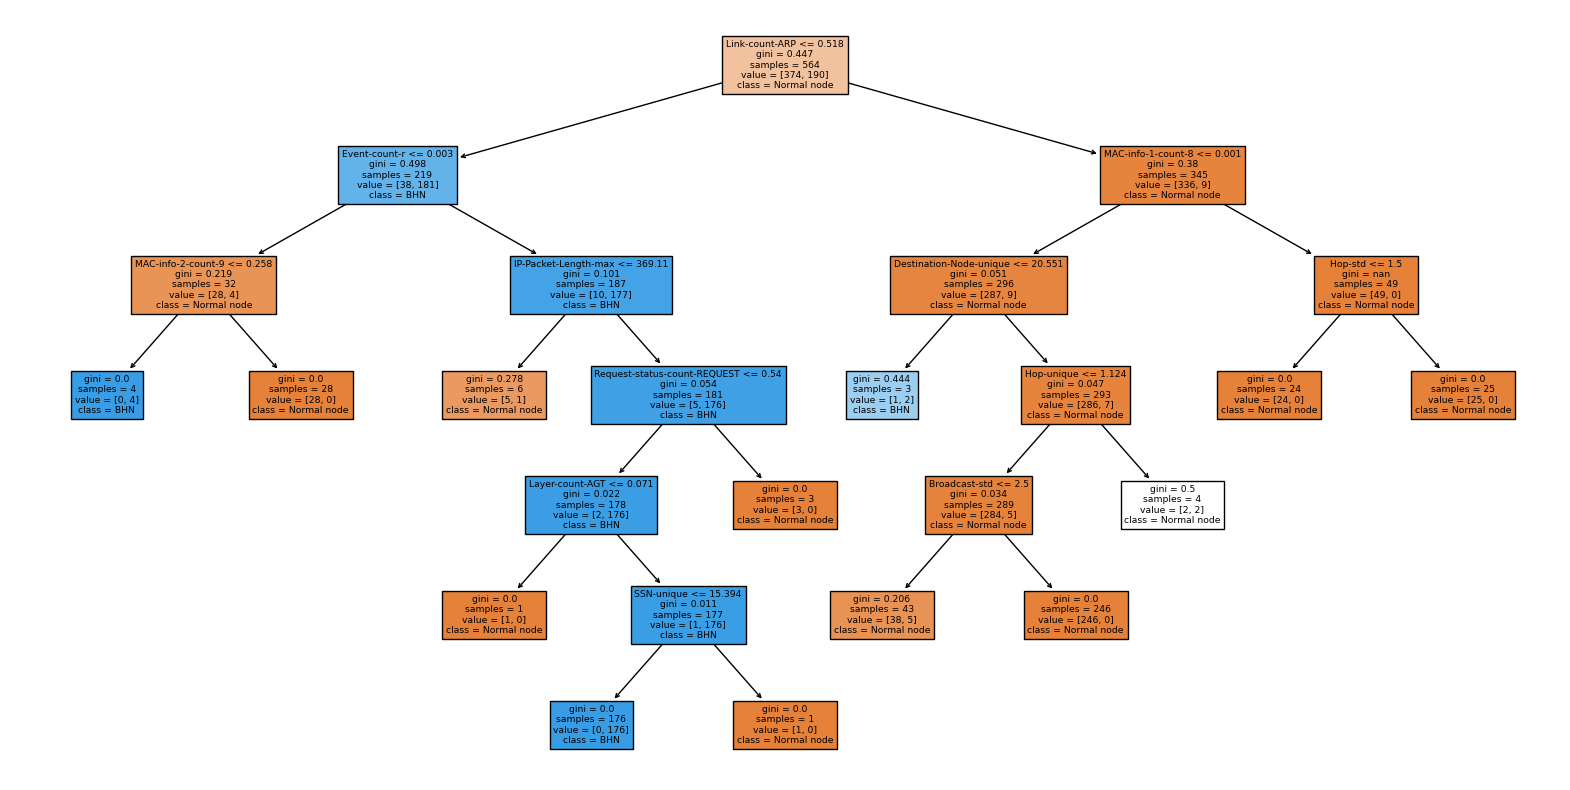

In [449]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train.values.ravel())

dt_y_pred= dt_model.predict(X_test)

# Decision Tree
print("DT:")
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))
print("Precision:",metrics.precision_score(y_test, dt_y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, dt_y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, dt_y_pred, average = 'weighted'))
dt_report = classification_report(y_test, dt_y_pred, target_names = ["Normal node","BHN"])
print(dt_report)

dt_y_pred_best = dt_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred_best))
print("Precision:",metrics.precision_score(y_test, dt_y_pred_best, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, dt_y_pred_best, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, dt_y_pred_best, average = 'weighted'))

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dt_model, 
                   filled=True,
                   feature_names= ns2_trace_opt_df_features.columns.values.tolist() if str(type(ns2_trace_opt_df_features.columns)) != "list" else ns2_trace_opt_df_features.columns,
                   class_names= ["Normal node","BHN"]
                   )



In [450]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Mean Accuracy: 0.9504
Standard Deviation: 0.0182


In [451]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[87,  2],
       [ 2, 50]])

In [452]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test['is_malicious'].values, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

print(misclassifiedIndexes)

# find the misclassified rows
misclassified_rows = X_test.iloc[misclassifiedIndexes]
misclassified_rows

[47, 65, 135, 138]


,Event-count-s,Event-count-r,Event-count-d,Event-count-f,Destination-Node-unique,Node-y-mean,Layer-count-AGT,Layer-count-RTR,Layer-count-IFQ,Link-count----,Link-count-COL,Link-count-CBK,Link-count-TTL,Link-count-ARP,MAC-state-count-0,MAC-state-count-52e,MAC-state-count-3f4,MAC-state-count-5ae,MAC-state-count-474,MAC-state-count-14ee,MAC-state-count-13b4,MAC-info-1-count-0,MAC-info-1-count-ffffffff,MAC-info-1-count-2,MAC-info-1-count-3,MAC-info-1-count-6,MAC-info-1-count-7,MAC-info-1-count-9,MAC-info-1-count-8,MAC-info-1-count-4,MAC-info-1-count-5,MAC-info-1-count-a,MAC-info-2-count-0,MAC-info-2-count-10,MAC-info-2-count-a,MAC-info-2-count-3,MAC-info-2-count-2,MAC-info-2-count-8,MAC-info-2-count-4,MAC-info-2-count-c,MAC-info-2-count-6,MAC-info-2-count-5,MAC-info-2-count-9,MAC-info-3-count-800,MAC-info-3-count-806,IP-packet-type-count-AODV,IP-Packet-Length-total,IP-Packet-Length-unique,IP-Packet-Length-std,IP-Packet-Length-min,IP-Packet-Length-max,IP-Packet-Length-mean,IP-identifier-std,TTL-unique,TTL-std,TTL-min,TTL-max,TTL-mean,Protocol-count-aodv,Type-count-0x2,Type-count-0x4,Type-count-0x8,Hop-unique,Hop-std,Hop-min,Hop-max,Hop-mean,Broadcast-unique,Broadcast-std,Broadcast-max,DSN-unique,SSN-unique,SSN-std,SIP-unique,SSN-status-unique,SSN-status-std,Request-status-count-REQUEST,Request-status-count-REPLY,Request-status-count-ERROR
47,0.3,0.692308,0.000000,0.000000,3,421.524628,0.000000,0.230769,0.0,1.000000,0.000000,0.0,0.0,0.0,0.692308,0.051282,0.051282,0.051282,0.051282,0.000000,0.000000,0.051282,0.538462,0.000000,0.000000,0.102564,0.0,0.000000,0.0,0.0,0.0,0.0,0.384615,0.00000,0.102564,0.00000,0.000000,0.0,0.000000,0.000000,0.128205,0.000000,0.025641,0.410256,0.230769,1.000000,53.555557,3,17.670921,44.0,102.0,53.555557,0.000000,4,0.970143,27.0,30.0,29.000000,0.666667,0.777778,0.222222,0.000000,4,0.970143,1.0,4.0,2.0,1,0.00000,1.0,7,2,0.427793,7,1,0.000000,0.777778,0.222222,0.000000
65,0.5,0.363636,0.090909,0.000000,2,5.550000,0.000000,0.181818,0.0,0.909091,0.090909,0.0,0.0,0.0,0.454545,0.000000,0.000000,0.363636,0.090909,0.000000,0.000000,0.090909,0.272727,0.454545,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.272727,0.00000,0.000000,0.00000,0.272727,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,1.000000,69.599998,4,31.476976,44.0,106.0,69.599998,0.000000,2,15.336232,2.0,30.0,13.200000,1.000000,0.600000,0.400000,0.000000,2,0.547723,1.0,2.0,1.6,2,0.57735,12.0,2,2,0.547723,1,2,1.154701,0.600000,0.400000,0.000000
135,0.5,0.473837,0.002907,0.058140,6,403.089966,0.055959,0.234738,0.0,0.997093,0.002907,0.0,0.0,0.0,0.354651,0.000727,0.000727,0.002907,0.002907,0.175145,0.170785,0.167878,0.012355,0.000000,0.002907,0.000000,0.0,0.116279,0.0,0.0,0.0,0.0,0.517442,0.00218,0.000000,0.00436,0.000000,0.0,0.001453,0.002907,0.000727,0.001453,0.234738,0.303052,0.001453,0.037037,523.543213,8,96.405192,32.0,590.0,523.543213,1845.790801,6,4.590444,1.0,32.0,29.521605,0.923077,0.583333,0.333333,0.083333,3,0.834058,1.0,3.0,2.0,1,0.00000,19.0,3,4,5.754488,3,1,0.000000,0.583333,0.333333,0.083333
138,0.5,0.468393,0.003808,0.059406,4,403.090027,0.057121,0.233054,0.0,0.996192,0.003808,0.0,0.0,0.0,0.347296,0.000000,0.000000,0.000000,0.000000,0.182026,0.175933,0.171363,0.000000,0.000000,0.000000,0.000000,0.0,0.118812,0.0,0.0,0.0,0.0,0.523229,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.241432,0.294745,0.000000,0.000000,541.598022,3,29.125641,512.0,590.0,541.598022,346.128072,3,1.087135,29.0,32.0,30.235294,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN


In [440]:
import joblib

joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']